<a href="https://colab.research.google.com/github/cmessoftware/Diplomatura_DS_GrupoM/blob/main/2da_Prueba_Diplomatura_CDyAA_Proyecyo_Final_Grupo_M_Cuaderno(COLAB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto Final: Modelo de Machine learning para predecir Alteración del Orden en el Sistema Penitenciario Argentino**

**Grupo M:**
Lucia Cortes,
María Fernanda Farias,
Favio Ruggieri,
Alejandro Gomez,
Sergio Salanitri,
Karina Calvo

### PreProcesamiento ya realizado sobre el csv original

In [ ]:

# 1. Mapeos ya implementado en: csv
# participo_alteracion_orden_ult_anio_id = {
#     0: "",
#     1: "SI - Alteración del orden con heridos o muertos",
#     2: "SI - Alteración del orden con rehenes",
#     3: "SI - Alteración del orden con daños",
#     4: "SI - Alteración del orden SIN heridos, ni rehenes",
#     5: "No participó de ninguna alteración"
# }

# participo_alteracion_orden_ult_anio_id_recodificado = {
#     0: "No Info",   #0
#     1: "No participó de ninguna alteración", #5
#     2: "SI - Alteración del orden leve" # 3,4
#     3: "SI -  Alteración del orden grave" # 1,2
# }

# nivel_instruccion_id_recodificado = {
#     0 : "",
#     1: 'Ninguno',
#     2: 'Primaria incompleta',
#     10:'Primaria incompleta',
#     11:'Primaria incompleta',
#     3: "Primeria completa",
#     13:"Primeria completa",
#     4: "Secundaria incompleta",
#     14:"Secundaria incompleta",
#     15:"Secundaria incompleta",
#     16:"Secundaria incompleta",
#     5: "Secundaria completa",
#     17:"Secundaria completa",
#     6: "Terciario o Universitario incompleto",
#     8: "Terciario o Universitario incompleto",
#     7: "Terciario o Universitario completo",
#     9: "Terciario o Universitario completo",
# }

# nacionalidad_id_recodificado = {

#     0: "",
#     1: "Argentino",  #1
#     2,17: "Entranjero" #2
# }

# estado_civil_id_recodificado = {
#     0 :"",
#     1 : "Soltero",
#     2: "Casado * Concubino",
#     6: "Casado * Concubino",
#     3: "Viudo",
#     4: "Separado / Divorciado",
#     5: "Separado / Divorciado",
# }

#2.Eliminación de columnas explicativas de las categorías (3)
# 'provincia_descripcion',
# 'establecimiento_descripcion',
# 'genero_descripcion',
# 'nacionalidad_descripcion',
# 'estado_civil_descripcion',
# 'nivel_instruccion_descripcion',
# 'ultima_situacion_laboral_descripcion',
# 'capacitacion_laboral_al_ingresar_descripcion',
# 'ultimo_lugar_residencia_descripcion',
# 'ultima_provincia_residencia_descripcion',
# 'jurisdiccion_descripcion',
# 'situacion_legal_descripcion',
# 'establecimiento_procedencia_descripcion',
# 'delito1_descripcion',
# 'delito2_descripcion',
# 'delito3_descripcion',
# 'delito4_descripcion',
# 'delito5_descripcion',
# 'horas_trabajo_remunerado_descripcion',
# 'participacion_programa_educativo_descripcion',
# 'recibio_atencion_medica_ult_anio_descripcion',
# 'participo_alteracion_orden_ult_anio_descripcion',
# 'tipo_infraccion_disciplinaria__descripcion',
# 'sancion_aplicada_descripcion',
# 'calificacion_conducta_descripcion',
# 'tentativa_fugas_evasiones_descripcion',
# 'fue_lesionado_descripcion',
# 'es_reincidente_descripcion',
# 'tiene_periodo_progresividad_descripcion',
# 'reparticion_descripcion',
# 'tuvo_salidas_transitorias_descripcion',
# 'incorporado_reg_semi_libertad_descripcion',
# 'participa_programa_prision_discontinua_descripcion',
# 'participa_programa_semi_detencion_descripcion',
# 'tuvo_reduccion_pena_descripcion'

s

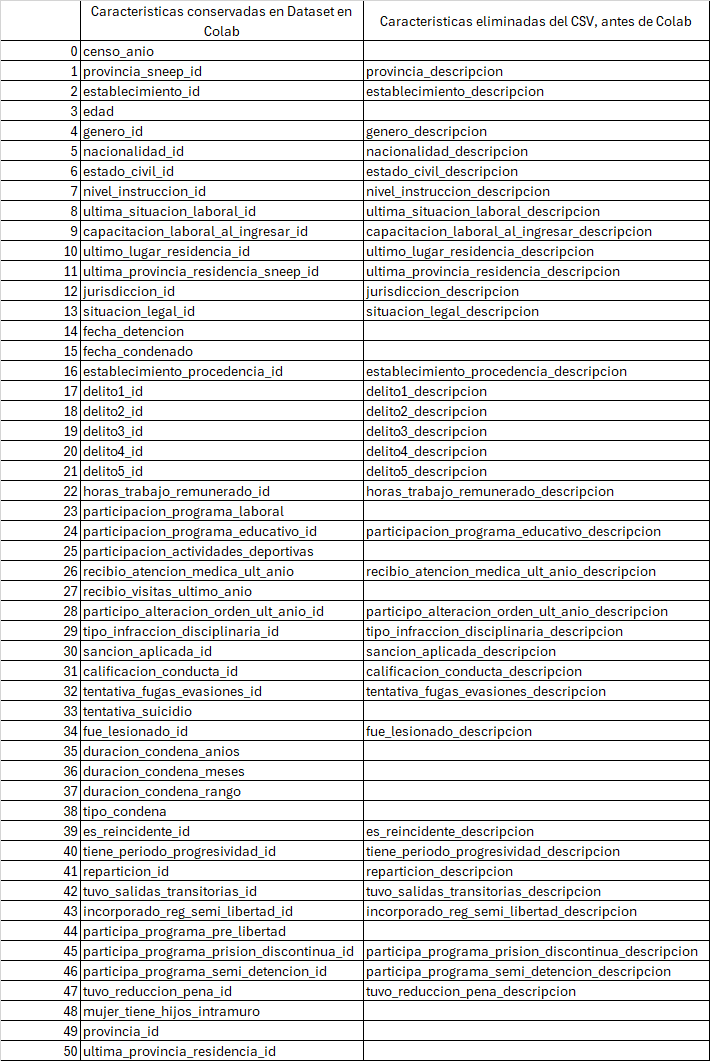

# Análisis Exploratorio de Datos

## Pre-procesamiento del Dataset


In [ ]:
# Intalación de librerias
!pip install missingno

In [ ]:
# Intalación de librerias
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 1. Cargar dataset
df=pd.read_csv("/content/sneep-unificado-procesado-completo-sin-descripcion-recodificado.csv", sep=',', low_memory=False)

In [ ]:
# 2. Info del dataset
df.shape

(1436508, 51)

In [ ]:
df.head()

,censo_anio,provincia_sneep_id,establecimiento_id,edad,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,...,reparticion_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
0,2002,20,150,26,1,2,2,3,2,1,...,1,1,1,False,1,1,4,NaN,82,82.0
1,2002,20,150,25,1,2,0,2,2,1,...,1,1,1,False,1,1,4,NaN,82,82.0
2,2002,20,150,46,1,2,2,2,2,1,...,1,1,1,False,1,1,4,NaN,82,82.0
3,2002,20,150,24,1,2,0,2,3,3,...,1,1,1,False,1,1,4,NaN,82,82.0
4,2002,24,89,25,1,2,0,2,0,0,...,3,0,0,NaN,0,0,0,NaN,2,6.0


In [ ]:
df.tail()

,censo_anio,provincia_sneep_id,establecimiento_id,edad,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,...,reparticion_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
1436503,2002,6,16,36,2,2,2,3,3,1,...,1,1,1,True,1,1,4,False,26,26.0
1436504,2002,6,16,45,1,2,2,3,1,1,...,1,0,0,NaN,0,0,0,NaN,26,26.0
1436505,2002,6,16,22,1,2,0,2,3,3,...,1,0,0,NaN,0,0,0,NaN,26,26.0
1436506,2002,12,174,47,1,2,2,3,0,1,...,1,0,0,NaN,0,0,0,NaN,50,50.0
1436507,2002,12,174,31,1,2,0,2,0,1,...,1,0,0,NaN,0,0,4,NaN,50,50.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436508 entries, 0 to 1436507
Data columns (total 51 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   censo_anio                                 1436508 non-null  int64  
 1   provincia_sneep_id                         1436508 non-null  int64  
 2   establecimiento_id                         1436508 non-null  int64  
 3   edad                                       1436508 non-null  int64  
 4   genero_id                                  1436508 non-null  int64  
 5   nacionalidad_id                            1436508 non-null  int64  
 6   estado_civil_id                            1436508 non-null  int64  
 7   nivel_instruccion_id                       1436508 non-null  int64  
 8   ultima_situacion_laboral_id                1436508 non-null  int64  
 9   capacitacion_laboral_al_ingresar_id        1436508 non-null  int64  

In [ ]:
# Display the names of all columns
print("Nombre de las variables del dataset:")
display(df.columns.tolist())

Nombre de las variables del dataset:


['censo_anio',
 'provincia_sneep_id',
 'establecimiento_id',
 'edad',
 'genero_id',
 'nacionalidad_id',
 'estado_civil_id',
 'nivel_instruccion_id',
 'ultima_situacion_laboral_id',
 'capacitacion_laboral_al_ingresar_id',
 'ultimo_lugar_residencia_id',
 'ultima_provincia_residencia_sneep_id',
 'jurisdiccion_id',
 'situacion_legal_id',
 'fecha_detencion',
 'fecha_condenado',
 'establecimiento_procedencia_id',
 'delito1_id',
 'delito2_id',
 'delito3_id',
 'delito4_id',
 'delito5_id',
 'horas_trabajo_remunerado_id',
 'participacion_programa_laboral',
 'participacion_programa_educativo_id',
 'participacion_actividades_deportivas',
 'recibio_atencion_medica_ult_anio',
 'recibio_visitas_ultimo_anio',
 'participo_alteracion_orden_ult_anio_id',
 'tipo_infraccion_disciplinaria_id',
 'sancion_aplicada_id',
 'calificacion_conducta_id',
 'tentativa_fugas_evasiones_id',
 'tentativa_suicidio',
 'fue_lesionado_id',
 'duracion_condena_anios',
 'duracion_condena_meses',
 'duracion_condena_rango',
 'tipo

In [ ]:
for column in df.columns:
    num_unique_values = df[column].nunique()
    print(f'Number of unique values in {column}: {num_unique_values}')

Number of unique values in censo_anio: 21
Number of unique values in provincia_sneep_id: 24
Number of unique values in establecimiento_id: 430
Number of unique values in edad: 85
Number of unique values in genero_id: 5
Number of unique values in nacionalidad_id: 2
Number of unique values in estado_civil_id: 3
Number of unique values in nivel_instruccion_id: 7
Number of unique values in ultima_situacion_laboral_id: 4
Number of unique values in capacitacion_laboral_al_ingresar_id: 4
Number of unique values in ultimo_lugar_residencia_id: 3
Number of unique values in ultima_provincia_residencia_sneep_id: 25
Number of unique values in jurisdiccion_id: 27
Number of unique values in situacion_legal_id: 5
Number of unique values in fecha_detencion: 11866
Number of unique values in fecha_condenado: 13398
Number of unique values in establecimiento_procedencia_id: 5
Number of unique values in delito1_id: 32
Number of unique values in delito2_id: 31
Number of unique values in delito3_id: 31
Number

In [ ]:
# Eliminacion de Categorías no relevantes al problema de estudio
# Create a copy of the DataFrame
df_modified = df.copy()

# List of columns to drop
columns_to_drop = [
    'ultimo_lugar_residencia_id',
    'ultima_provincia_residencia_sneep_id',
    'jurisdiccion_id',
    'fecha_detencion',
    'fecha_condenado',
    'establecimiento_procedencia_id',
    'sancion_aplicada_id',
    'duracion_condena_meses',
    'duracion_condena_rango',
    'reparticion_id',
    'mujer_tiene_hijos_intramuro',
    'provincia_id',
    'ultima_provincia_residencia_id'
]

# Drop the specified columns
df_modified = df_modified.drop(columns=columns_to_drop, errors='ignore')

# Display the first few rows of the modified DataFrame
display(df_modified.head())

# Display the information of the modified DataFrame to check for dropped columns
display(df_modified.info())

,censo_anio,provincia_sneep_id,establecimiento_id,edad,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,...,duracion_condena_anios,tipo_condena,es_reincidente_id,tiene_periodo_progresividad_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id
0,2002,20,150,26,1,2,2,3,2,1,...,0,1.0,1,2,1,1,False,1,1,4
1,2002,20,150,25,1,2,0,2,2,1,...,5,0.0,1,2,1,1,False,1,1,4
2,2002,20,150,46,1,2,2,2,2,1,...,10,0.0,1,2,1,1,False,1,1,4
3,2002,20,150,24,1,2,0,2,3,3,...,5,0.0,1,2,1,1,False,1,1,4
4,2002,24,89,25,1,2,0,2,0,0,...,0,NaN,0,0,0,0,NaN,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436508 entries, 0 to 1436507
Data columns (total 38 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   censo_anio                                 1436508 non-null  int64  
 1   provincia_sneep_id                         1436508 non-null  int64  
 2   establecimiento_id                         1436508 non-null  int64  
 3   edad                                       1436508 non-null  int64  
 4   genero_id                                  1436508 non-null  int64  
 5   nacionalidad_id                            1436508 non-null  int64  
 6   estado_civil_id                            1436508 non-null  int64  
 7   nivel_instruccion_id                       1436508 non-null  int64  
 8   ultima_situacion_laboral_id                1436508 non-null  int64  
 9   capacitacion_laboral_al_ingresar_id        1436508 non-null  int64  

None

In [ ]:
df_modified.head()


,censo_anio,provincia_sneep_id,establecimiento_id,edad,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,...,duracion_condena_anios,tipo_condena,es_reincidente_id,tiene_periodo_progresividad_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id
0,2002,20,150,26,1,2,2,3,2,1,...,0,1.0,1,2,1,1,False,1,1,4
1,2002,20,150,25,1,2,0,2,2,1,...,5,0.0,1,2,1,1,False,1,1,4
2,2002,20,150,46,1,2,2,2,2,1,...,10,0.0,1,2,1,1,False,1,1,4
3,2002,20,150,24,1,2,0,2,3,3,...,5,0.0,1,2,1,1,False,1,1,4
4,2002,24,89,25,1,2,0,2,0,0,...,0,NaN,0,0,0,0,NaN,0,0,0


In [ ]:
# 4. Limpieza de datos
df_modified.isnull().sum()


,0
censo_anio,0
provincia_sneep_id,0
establecimiento_id,0
edad,0
genero_id,0
nacionalidad_id,0
estado_civil_id,0
nivel_instruccion_id,0
ultima_situacion_laboral_id,0
capacitacion_laboral_al_ingresar_id,0


In [ ]:
# Display the names of all columns
print("Nombre de las variables del dataset:")
display(df_modified.columns.tolist())

Nombre de las variables del dataset:


['censo_anio',
 'provincia_sneep_id',
 'establecimiento_id',
 'edad',
 'genero_id',
 'nacionalidad_id',
 'estado_civil_id',
 'nivel_instruccion_id',
 'ultima_situacion_laboral_id',
 'capacitacion_laboral_al_ingresar_id',
 'situacion_legal_id',
 'delito1_id',
 'delito2_id',
 'delito3_id',
 'delito4_id',
 'delito5_id',
 'horas_trabajo_remunerado_id',
 'participacion_programa_laboral',
 'participacion_programa_educativo_id',
 'participacion_actividades_deportivas',
 'recibio_atencion_medica_ult_anio',
 'recibio_visitas_ultimo_anio',
 'participo_alteracion_orden_ult_anio_id',
 'tipo_infraccion_disciplinaria_id',
 'calificacion_conducta_id',
 'tentativa_fugas_evasiones_id',
 'tentativa_suicidio',
 'fue_lesionado_id',
 'duracion_condena_anios',
 'tipo_condena',
 'es_reincidente_id',
 'tiene_periodo_progresividad_id',
 'tuvo_salidas_transitorias_id',
 'incorporado_reg_semi_libertad_id',
 'participa_programa_pre_libertad',
 'participa_programa_prision_discontinua_id',
 'participa_programa_semi

In [ ]:
# Remove duplicate rows and update df_modified
initial_rows = df_modified.shape[0]
df_modified.drop_duplicates(inplace=True)
rows_after_dropping = df_modified.shape[0]
num_duplicates_dropped = initial_rows - rows_after_dropping

print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after dropping duplicates: {rows_after_dropping}")
print(f"Number of duplicate rows dropped: {num_duplicates_dropped}")

display(df_modified.head())
display(df_modified.info())

Initial number of rows: 1436508
Number of rows after dropping duplicates: 1373714
Number of duplicate rows dropped: 62794


,censo_anio,provincia_sneep_id,establecimiento_id,edad,genero_id,nacionalidad_id,estado_civil_id,nivel_instruccion_id,ultima_situacion_laboral_id,capacitacion_laboral_al_ingresar_id,...,duracion_condena_anios,tipo_condena,es_reincidente_id,tiene_periodo_progresividad_id,tuvo_salidas_transitorias_id,incorporado_reg_semi_libertad_id,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_semi_detencion_id,tuvo_reduccion_pena_id
0,2002,20,150,26,1,2,2,3,2,1,...,0,1.0,1,2,1,1,False,1,1,4
1,2002,20,150,25,1,2,0,2,2,1,...,5,0.0,1,2,1,1,False,1,1,4
2,2002,20,150,46,1,2,2,2,2,1,...,10,0.0,1,2,1,1,False,1,1,4
3,2002,20,150,24,1,2,0,2,3,3,...,5,0.0,1,2,1,1,False,1,1,4
4,2002,24,89,25,1,2,0,2,0,0,...,0,NaN,0,0,0,0,NaN,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 1373714 entries, 0 to 1436507
Data columns (total 38 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   censo_anio                                 1373714 non-null  int64  
 1   provincia_sneep_id                         1373714 non-null  int64  
 2   establecimiento_id                         1373714 non-null  int64  
 3   edad                                       1373714 non-null  int64  
 4   genero_id                                  1373714 non-null  int64  
 5   nacionalidad_id                            1373714 non-null  int64  
 6   estado_civil_id                            1373714 non-null  int64  
 7   nivel_instruccion_id                       1373714 non-null  int64  
 8   ultima_situacion_laboral_id                1373714 non-null  int64  
 9   capacitacion_laboral_al_ingresar_id        1373714 non-null  int64  
 10 

None

In [ ]:
df_modified.shape


(1373714, 38)

In [ ]:
# Display value counts and proportions of the target variable
print("Value counts of 'participo_alteracion_orden_ult_anio_id':")
display(df_modified['participo_alteracion_orden_ult_anio_id'].value_counts())

print("\nProportions of 'participo_alteracion_orden_ult_anio_id':")
display(df_modified['participo_alteracion_orden_ult_anio_id'].value_counts(normalize=True))

Value counts of 'participo_alteracion_orden_ult_anio_id':


,count
participo_alteracion_orden_ult_anio_id,
1,1075065
2,178860
0,72280
3,47509



Proportions of 'participo_alteracion_orden_ult_anio_id':


,proportion
participo_alteracion_orden_ult_anio_id,
1,0.782597
2,0.130202
0,0.052616
3,0.034584


In [ ]:
# Filter out rows where 'participo_alteracion_orden_ult_anio_id' is 0
df_filtered = df_modified[df_modified['participo_alteracion_orden_ult_anio_id'] != 0].copy()

# Display the shape of the filtered DataFrame
print("Shape of the DataFrame after removing category 0:", df_filtered.shape)

# Display the value counts of the target variable in the filtered DataFrame
print("\nValue counts of 'participo_alteracion_orden_ult_anio_id' after filtering:")
display(df_filtered['participo_alteracion_orden_ult_anio_id'].value_counts())

print("\nProportions of 'participo_alteracion_orden_ult_anio_id' after filtering:")
display(df_filtered['participo_alteracion_orden_ult_anio_id'].value_counts(normalize=True))

Shape of the DataFrame after removing category 0: (1301434, 38)

Value counts of 'participo_alteracion_orden_ult_anio_id' after filtering:


,count
participo_alteracion_orden_ult_anio_id,
1,1075065
2,178860
3,47509



Proportions of 'participo_alteracion_orden_ult_anio_id' after filtering:


,proportion
participo_alteracion_orden_ult_anio_id,
1,0.826062
2,0.137433
3,0.036505


In [ ]:
# Tratamiento de valores faltantes:
# Replace null values with 0 in df_filtered
df_filtered.fillna(0, inplace=True)

# Verify that there are no more null values
print("Missing values after filling with 0:")
display(df_filtered.isnull().sum().sum())

Missing values after filling with 0:


np.int64(0)

Se reemplaza los valores faltantes por 0 porque en el dataset original los campos vacios de las categorías eran codificados como 0, las características que tienen valores faltantes no corresponden a la variable participo_alteracion_orden_ult_anio_id que es la que vamos a llamar target

In [ ]:
# Comprobación que se reemplazaron los valores faltantes por 0
df_filtered.isnull().sum()

,0
censo_anio,0
provincia_sneep_id,0
establecimiento_id,0
edad,0
genero_id,0
nacionalidad_id,0
estado_civil_id,0
nivel_instruccion_id,0
ultima_situacion_laboral_id,0
capacitacion_laboral_al_ingresar_id,0


In [ ]:
# Download the filtered DataFrame
df_filtered.to_csv('sneep-unificado-procesado-completo-sin-descripcion-recodificado_filtered.csv', index=False)
print("Filtered DataFrame saved as 'sneep-unificado-procesado-completo-sin-descripcion-recodificado_filtered.csv'")

Filtered DataFrame saved as 'sneep-unificado-procesado-completo-sin-descripcion-recodificado_filtered.csv'


In [ ]:
df_filtered.shape

(1301434, 38)

##Anális de frecuencia de cada variable en función del target

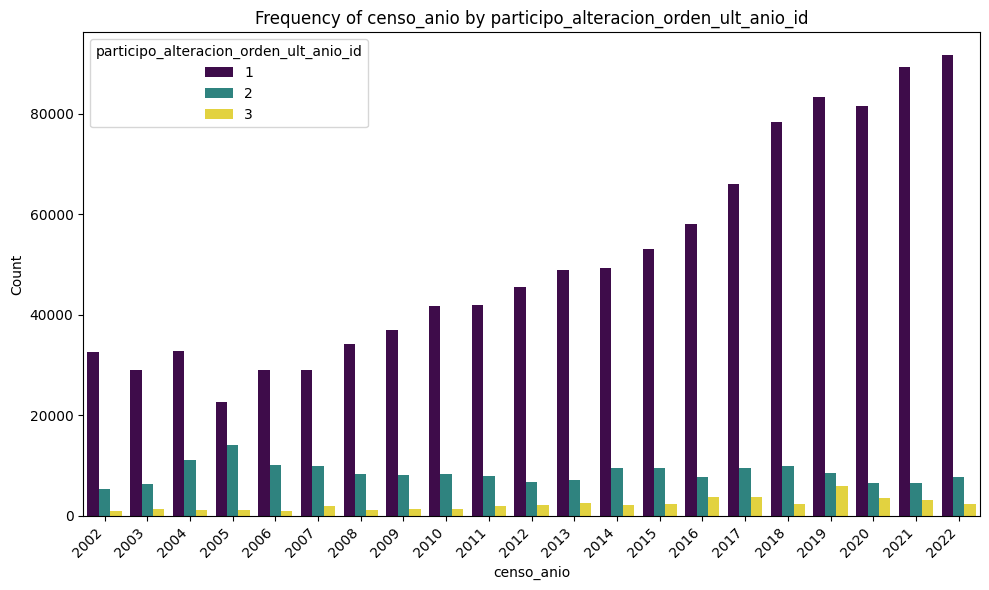

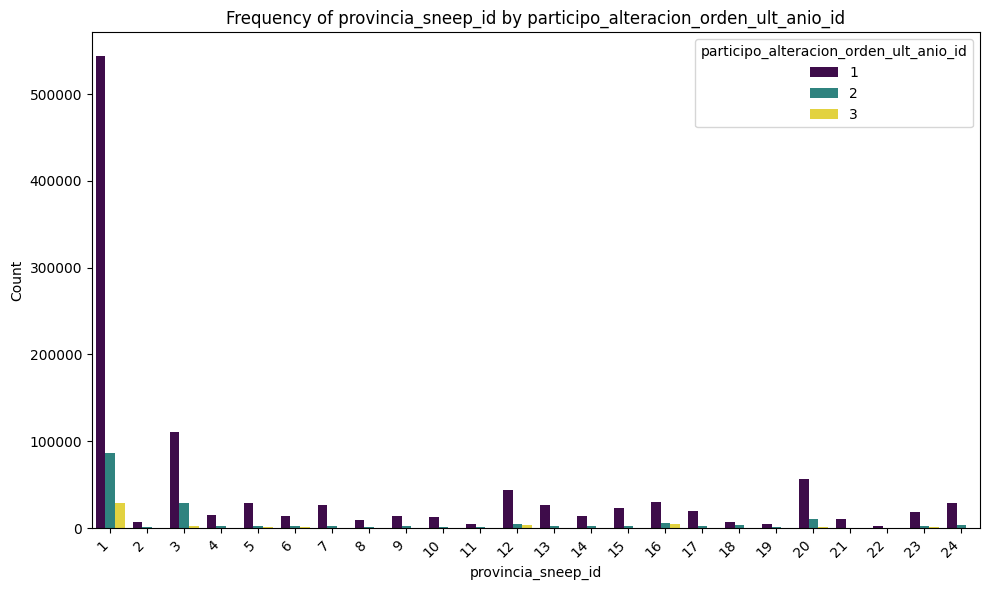

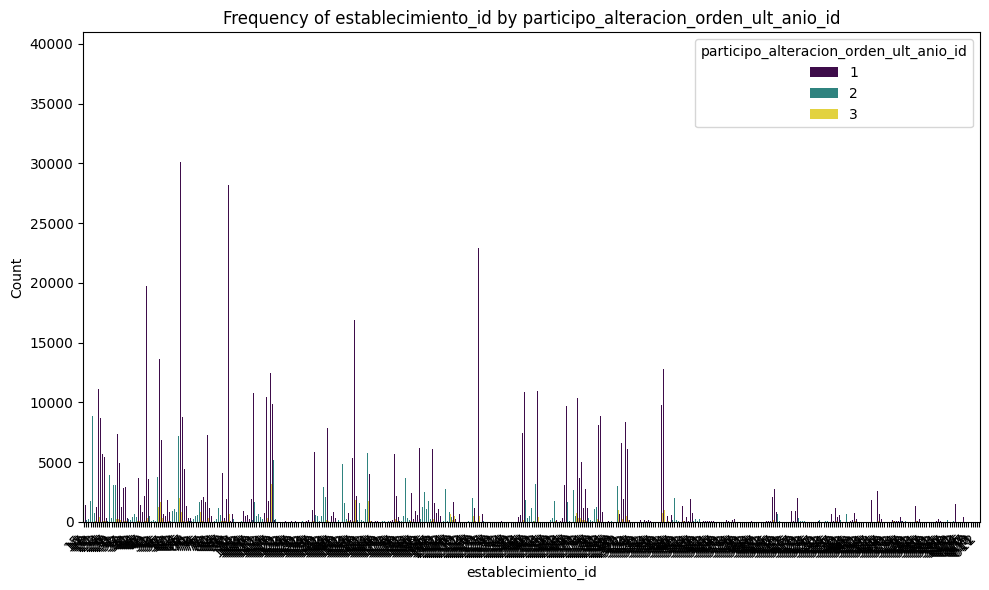

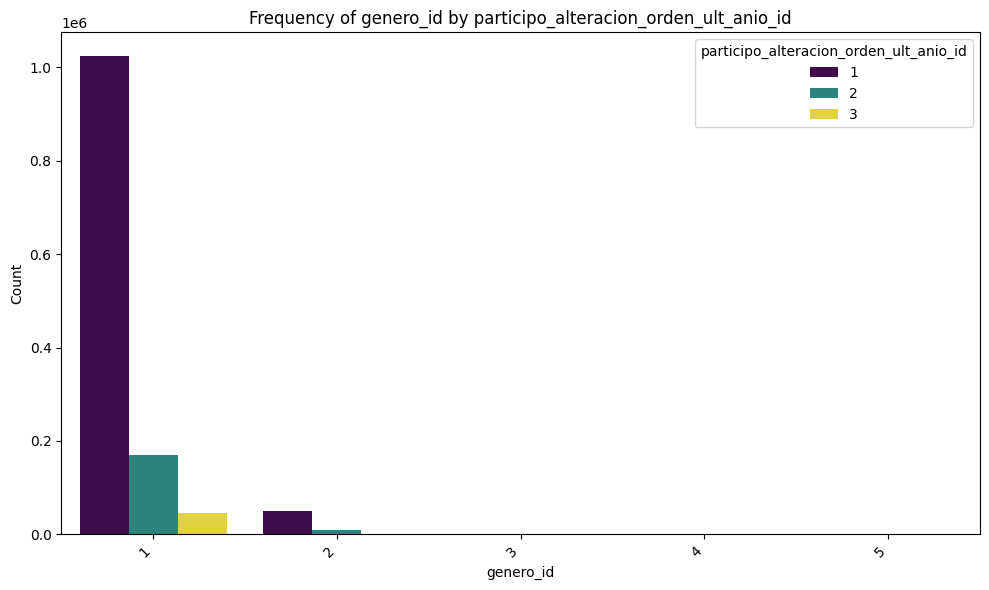

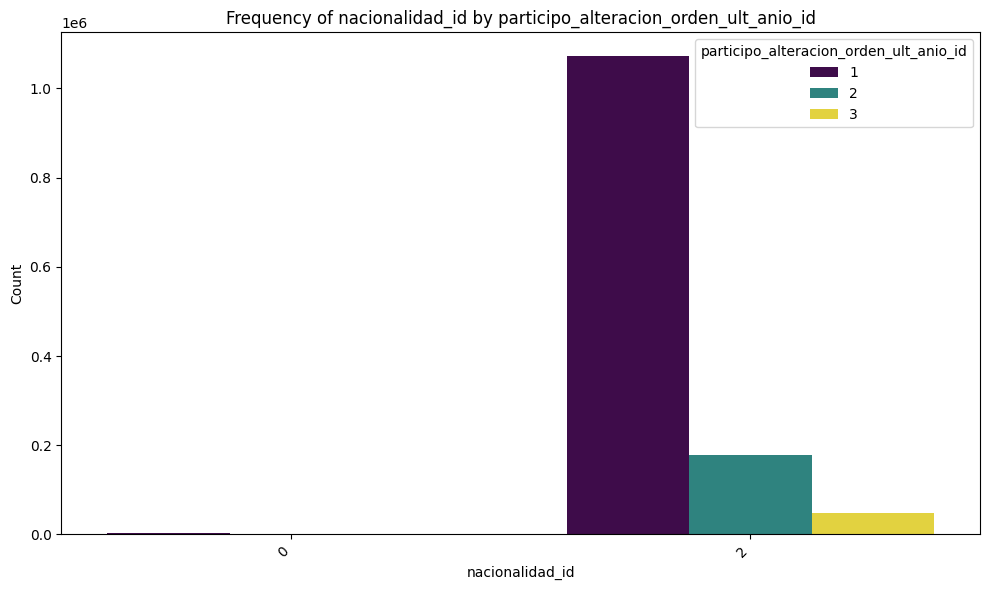

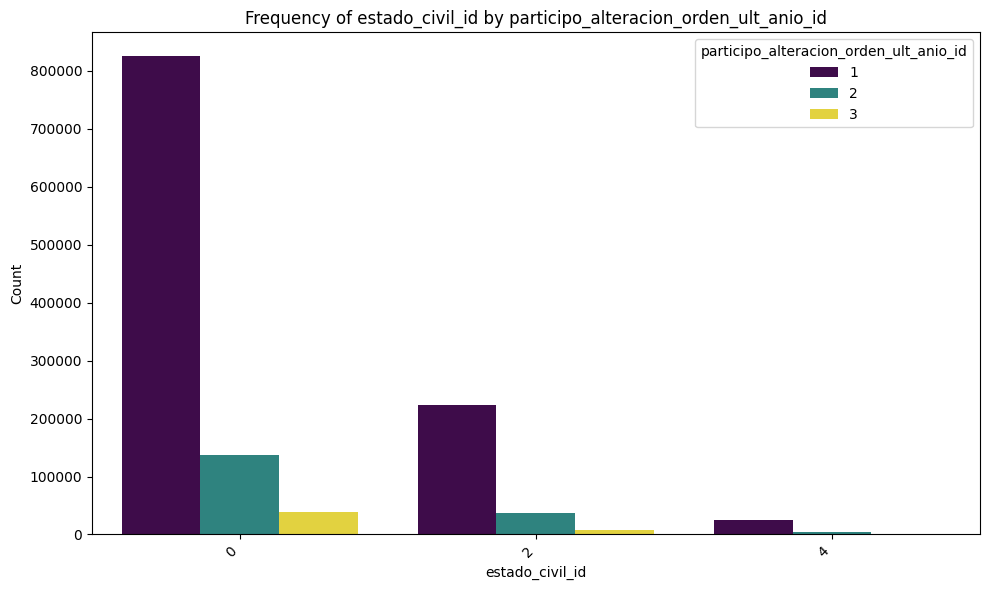

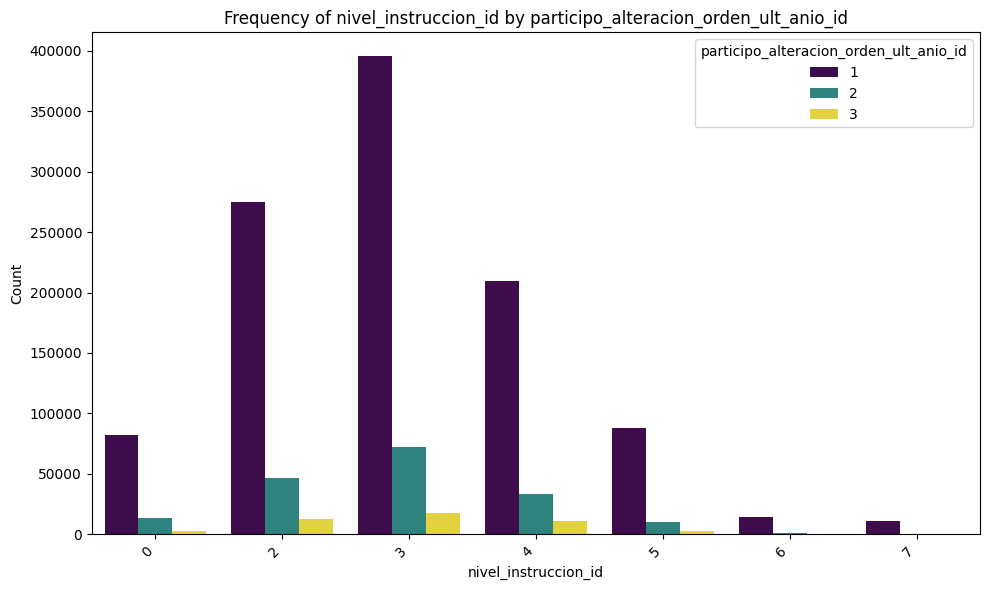

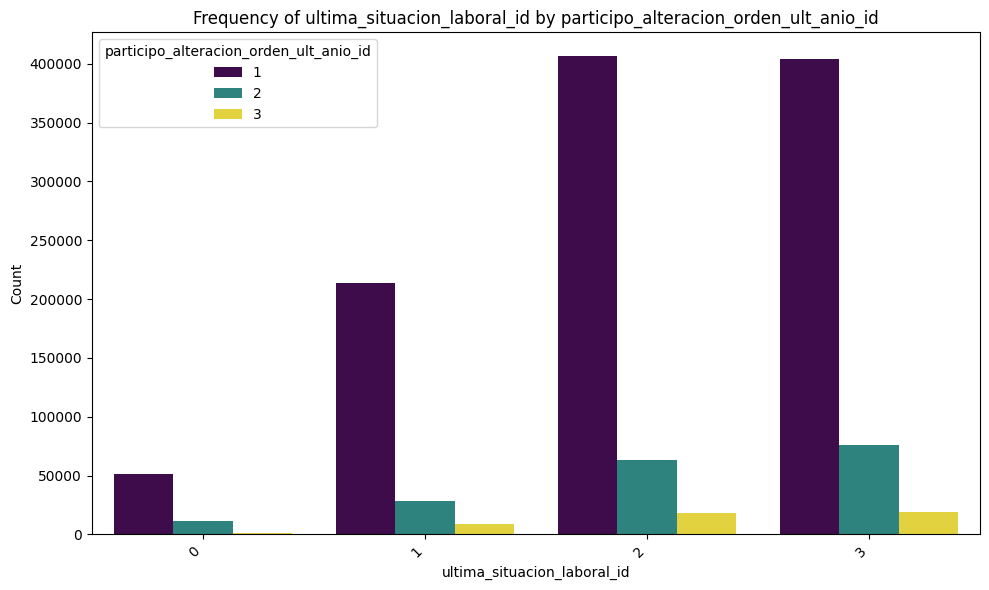

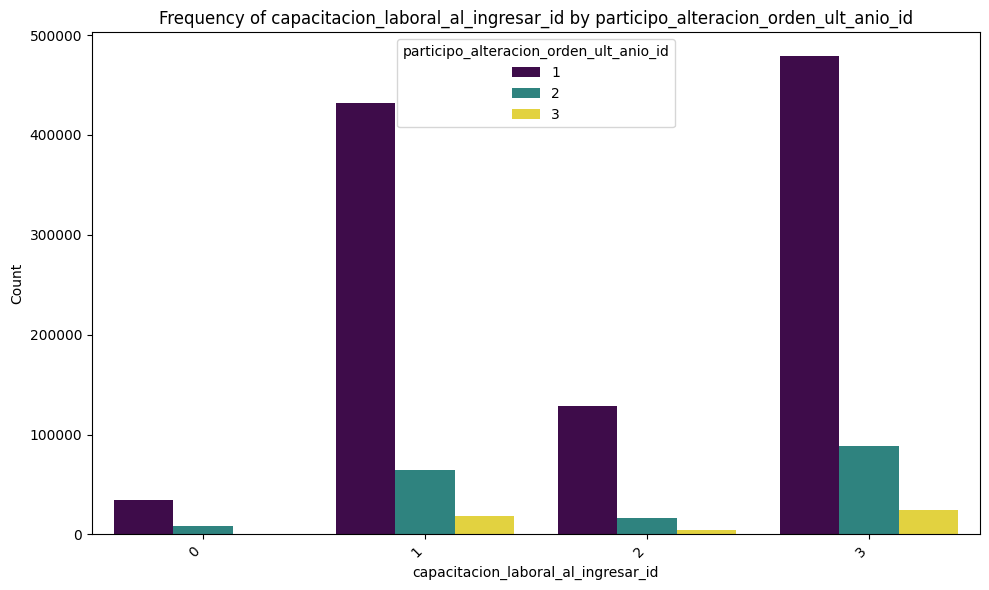

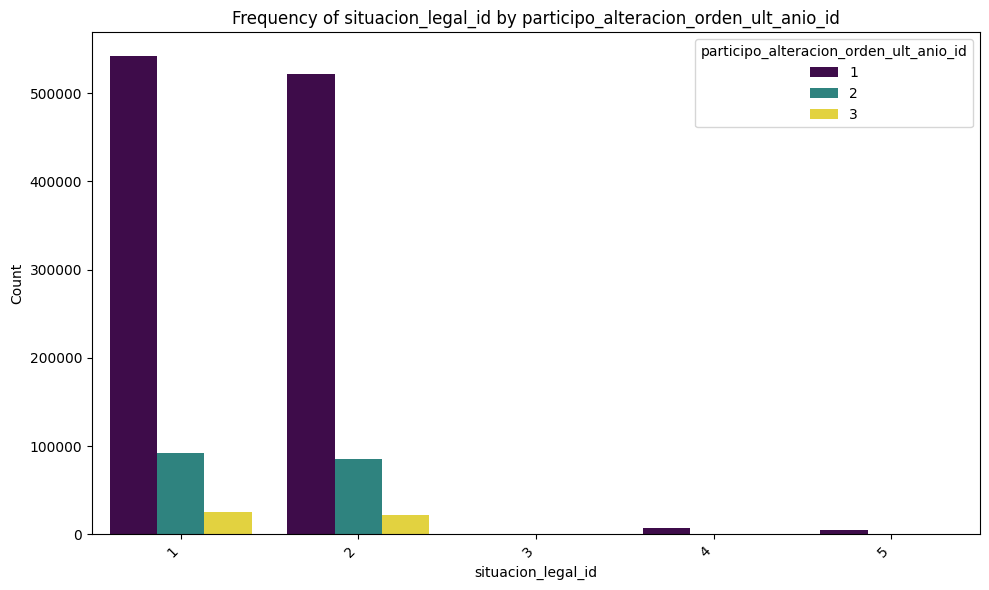

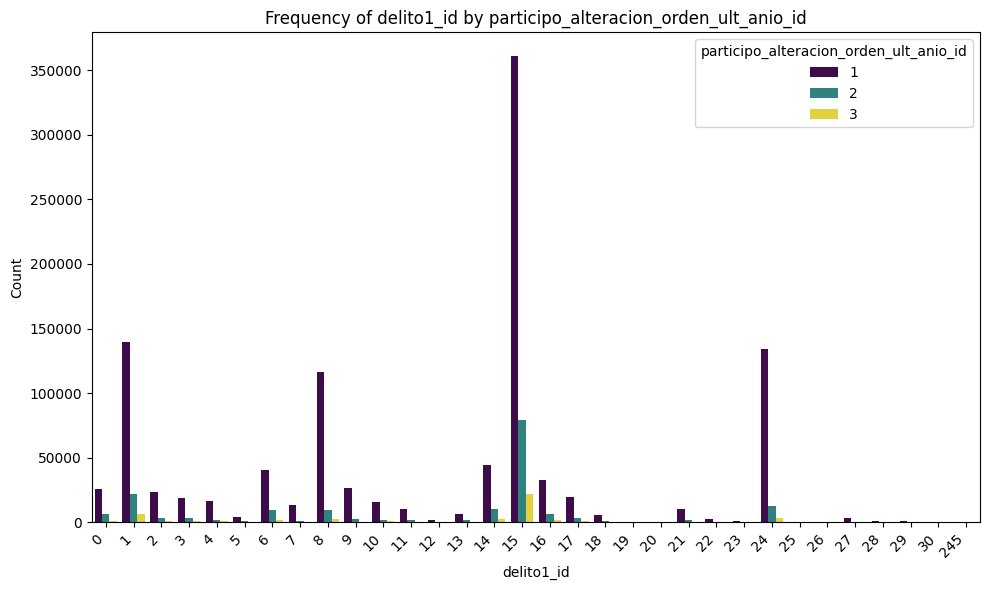

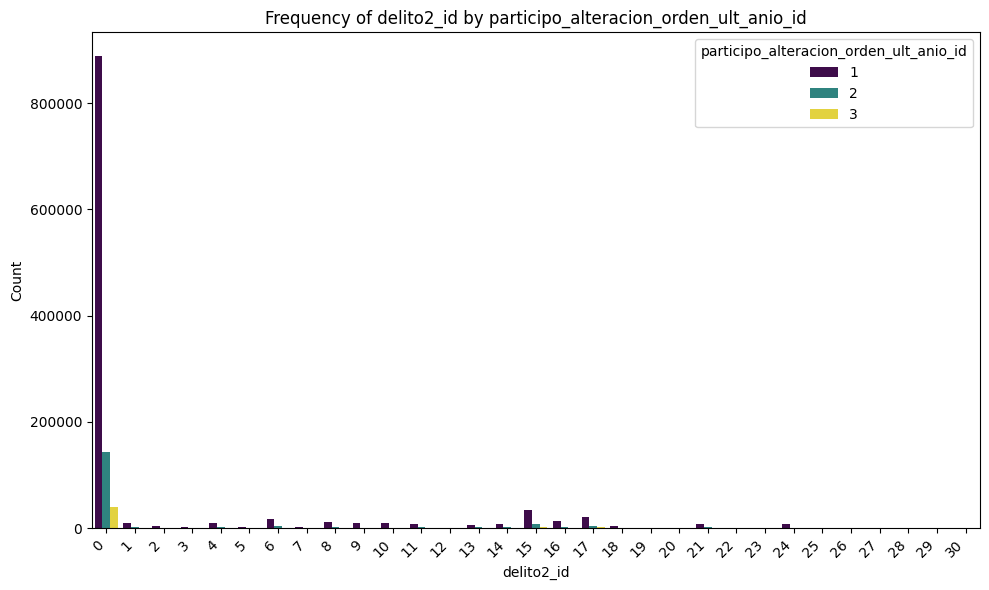

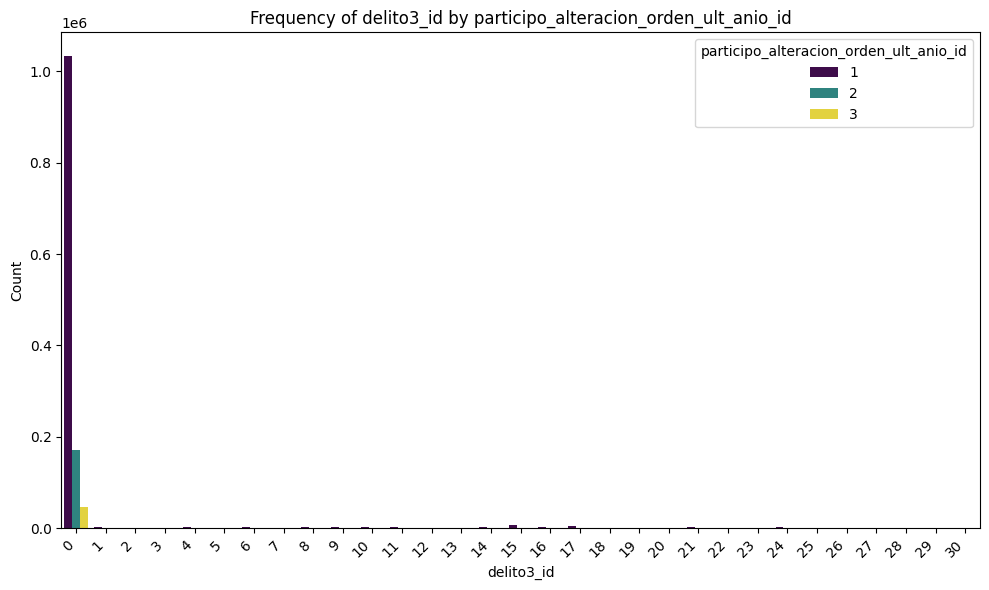

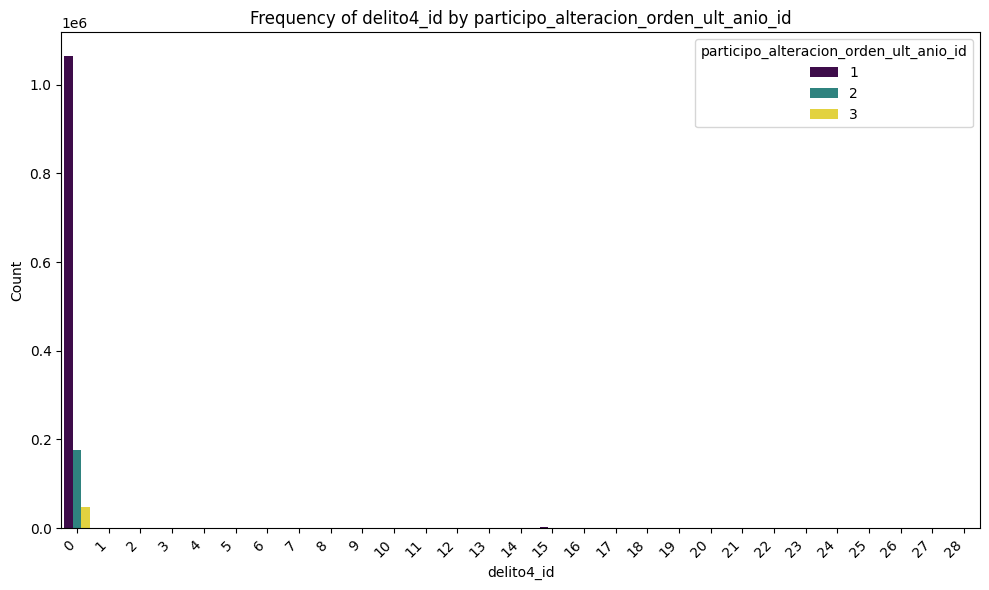

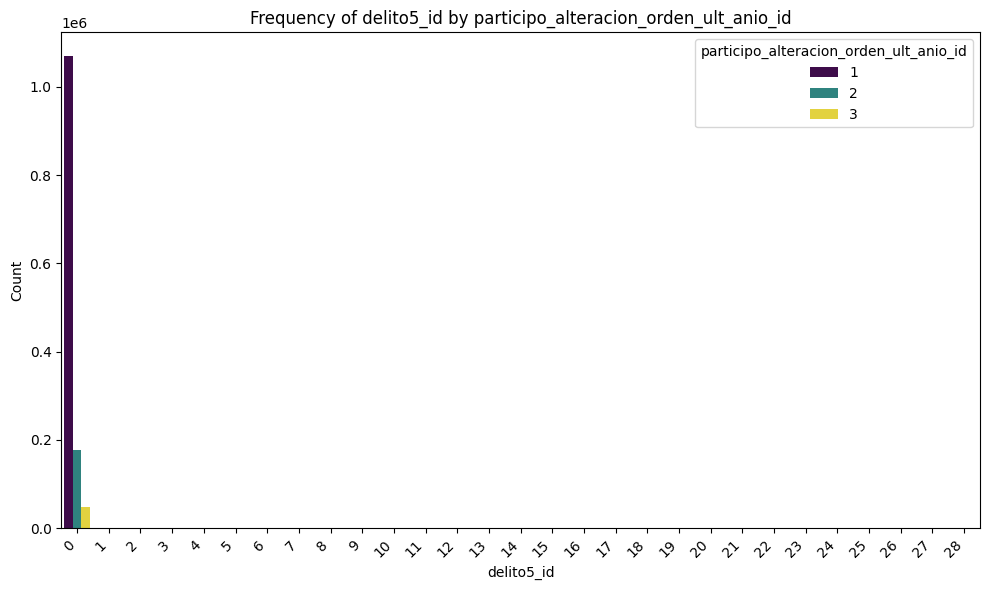

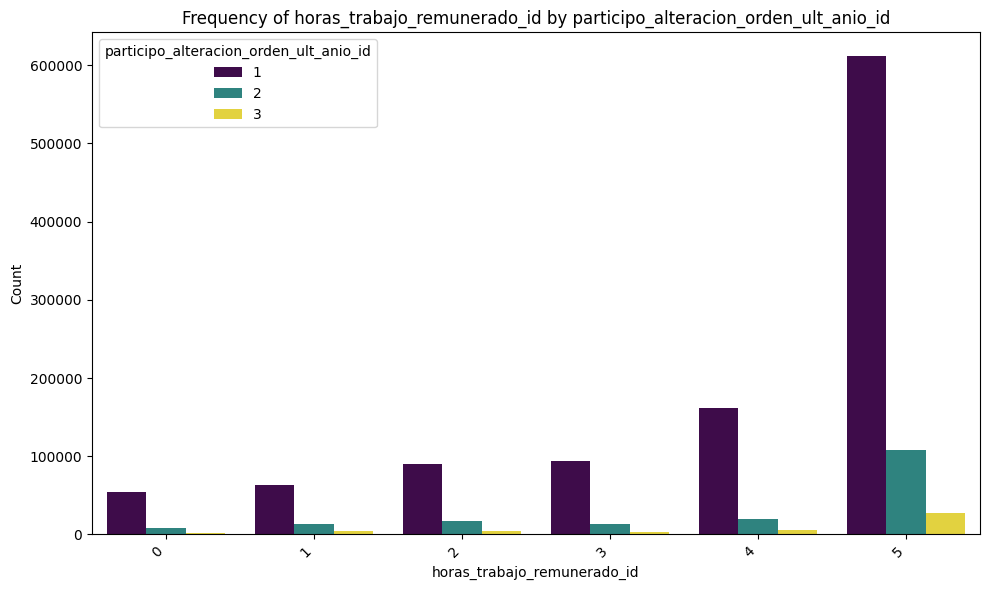

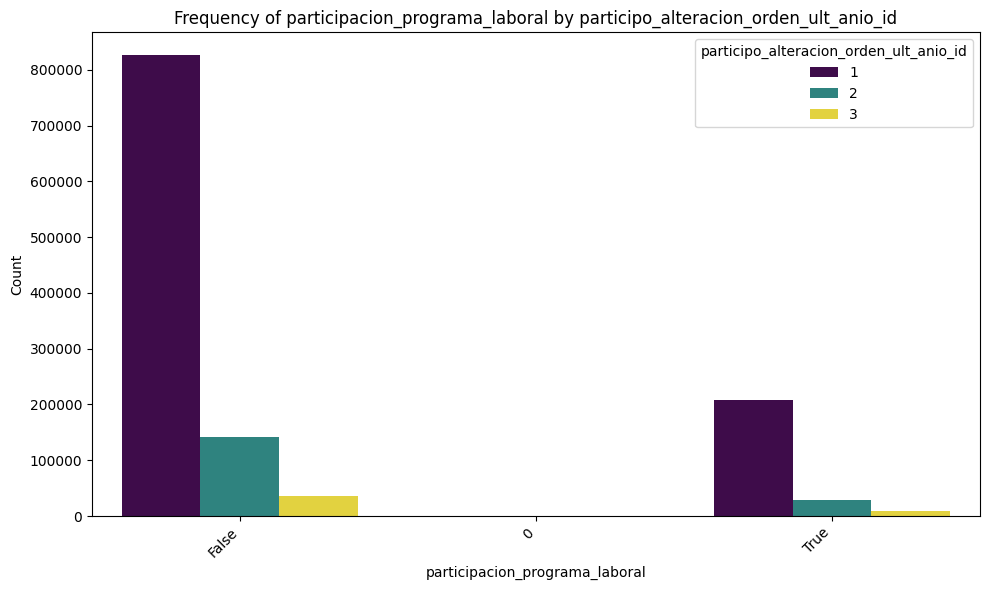

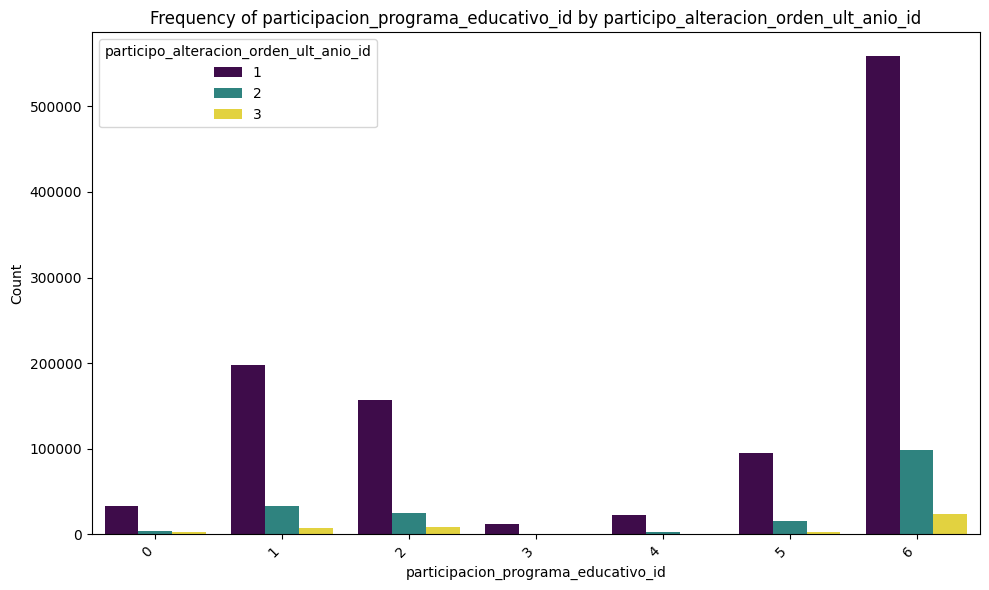

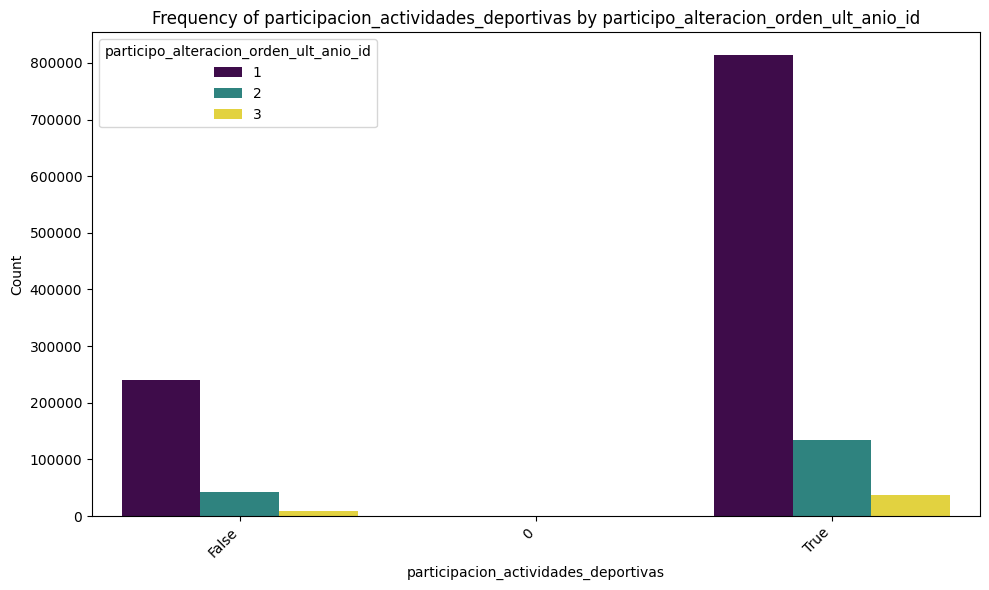

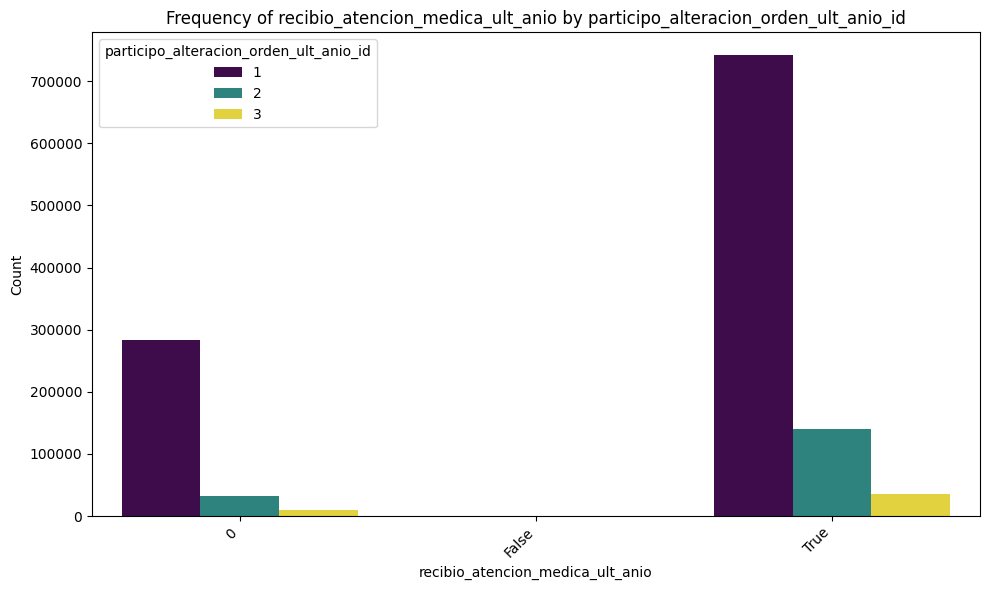

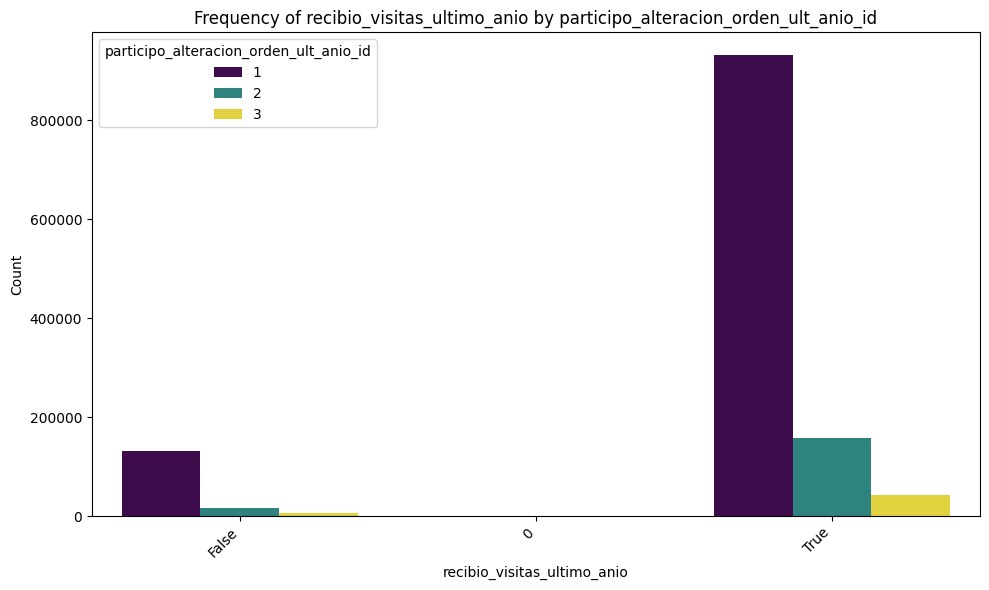

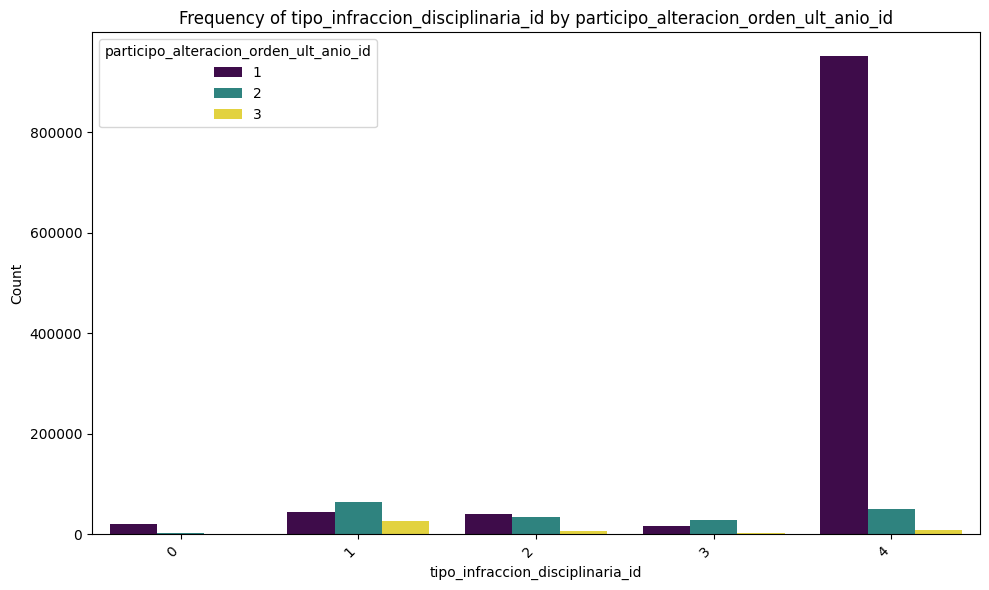

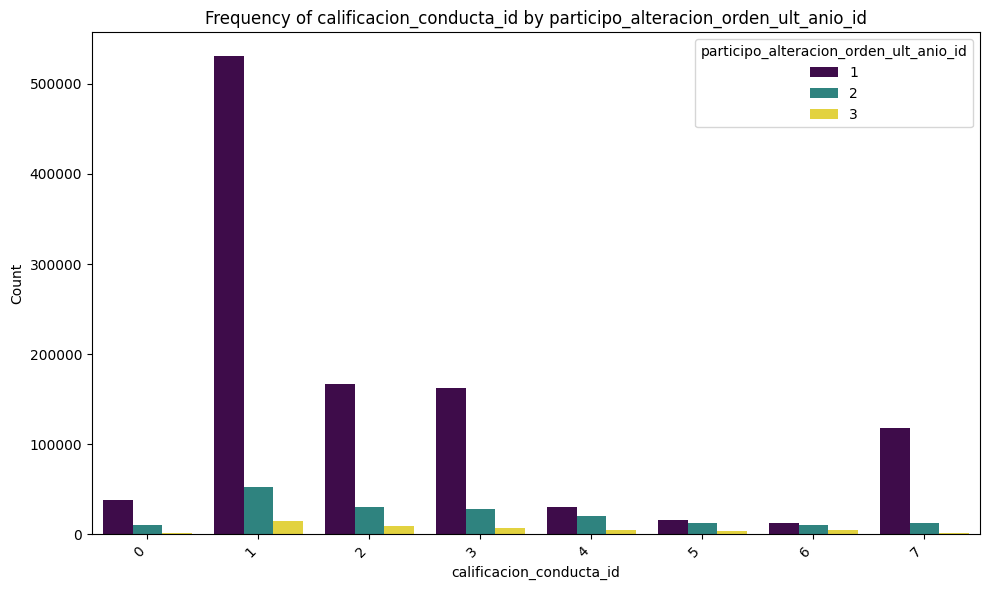

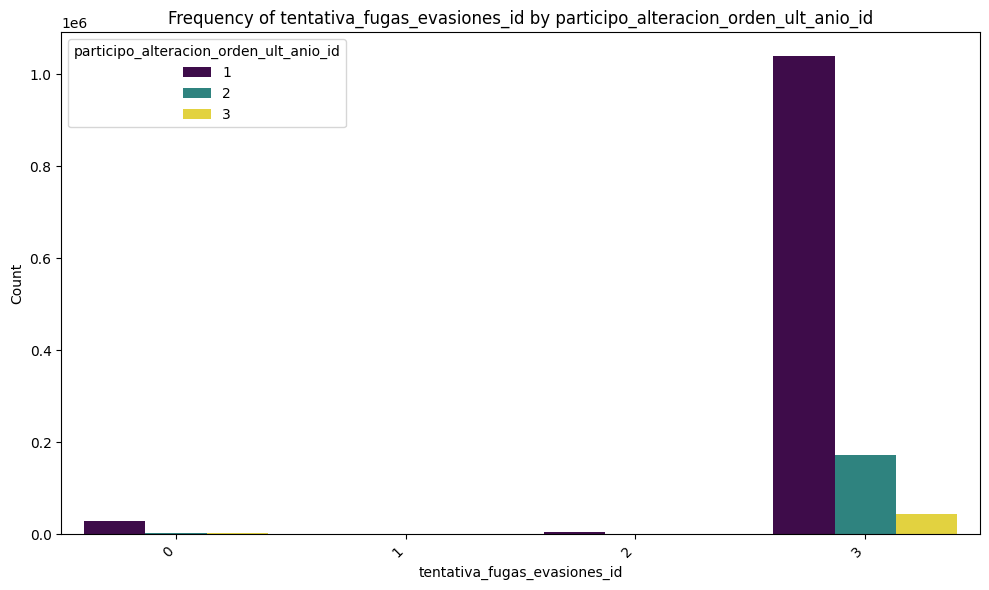

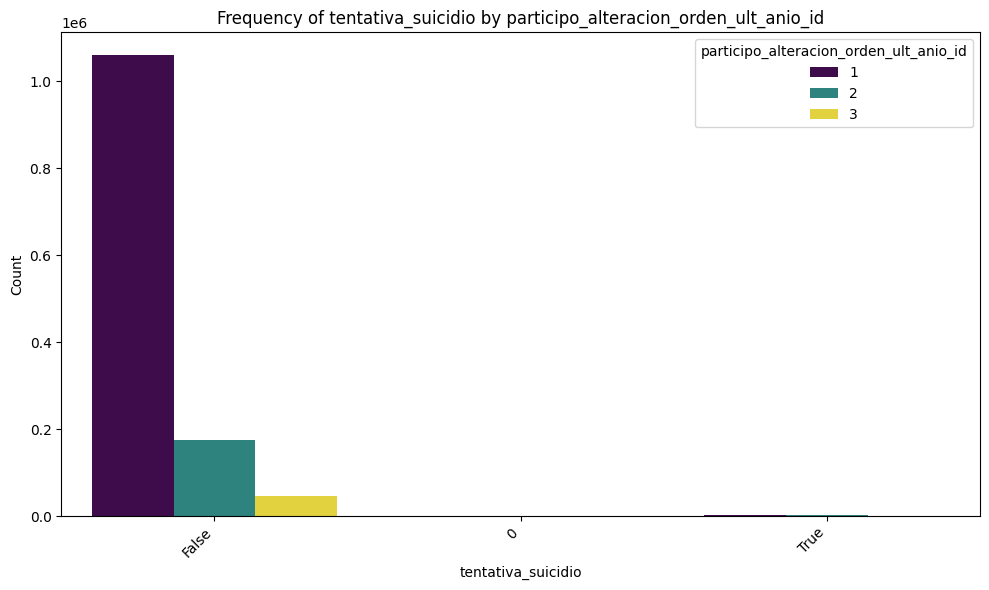

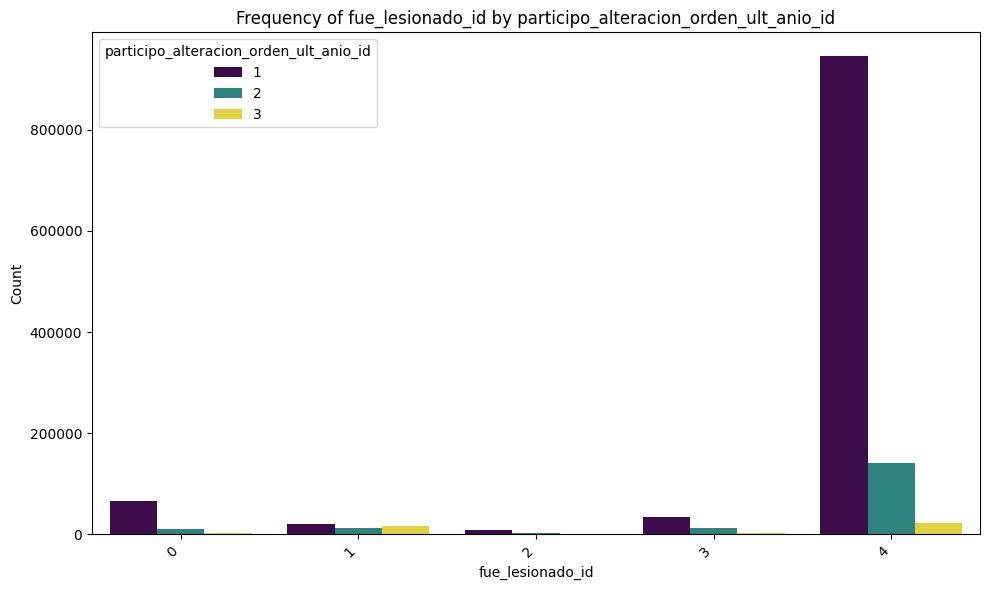

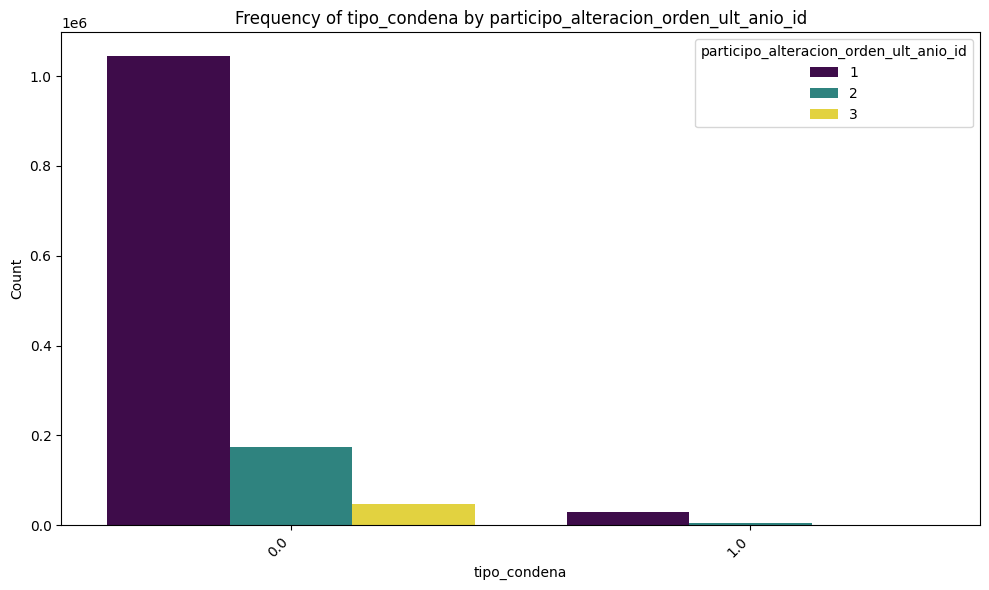

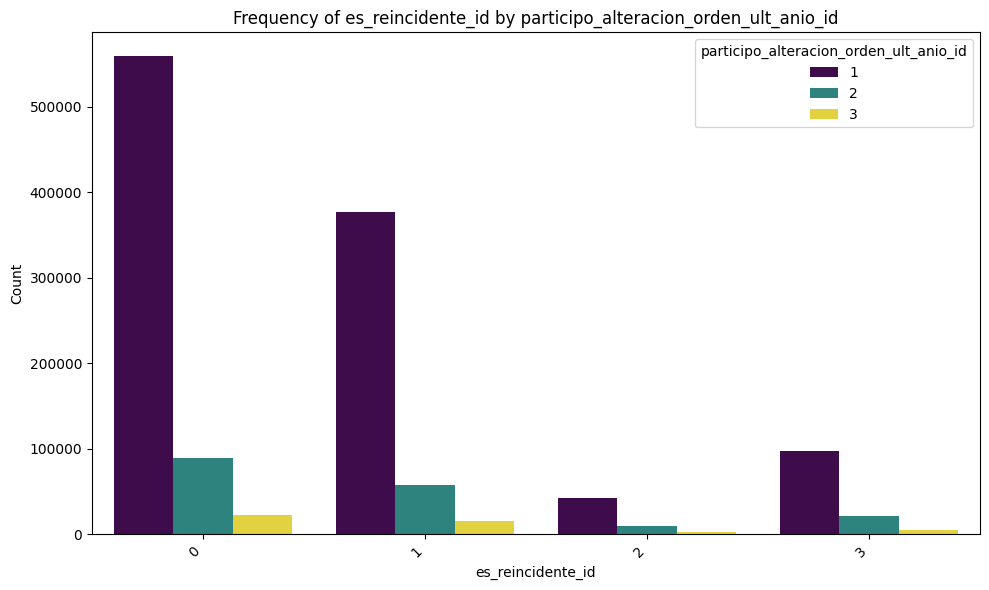

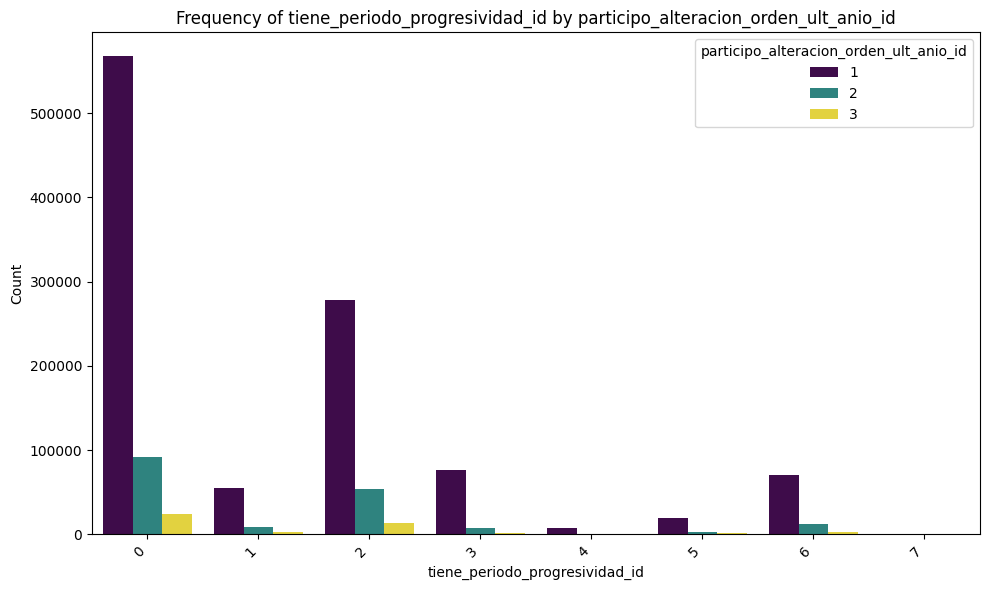

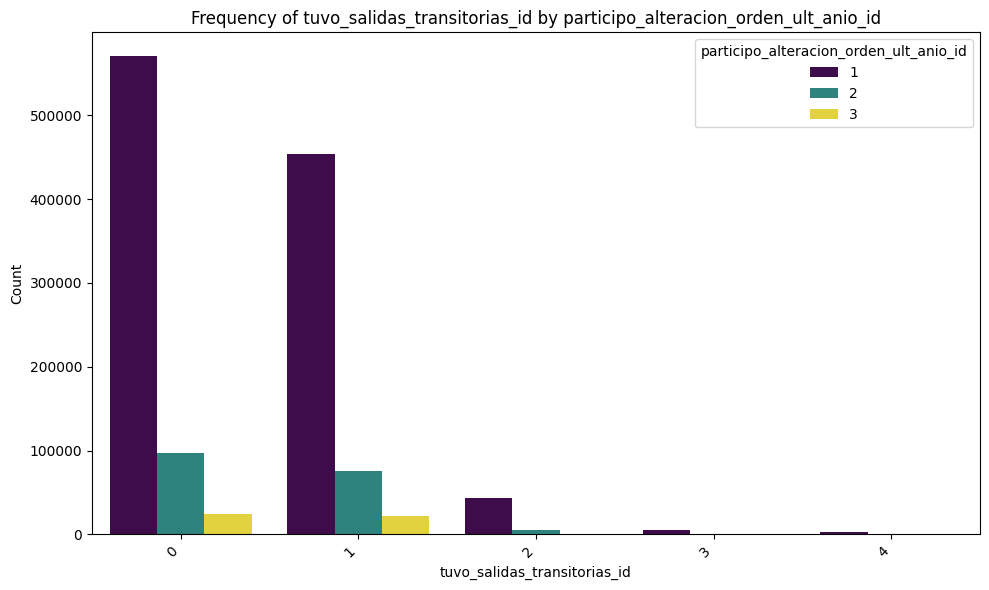

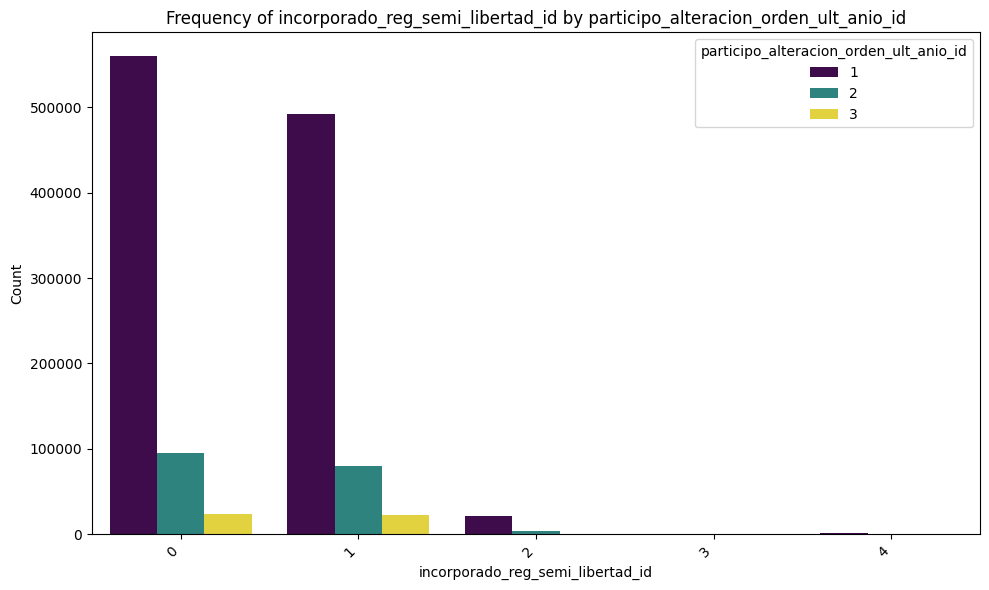

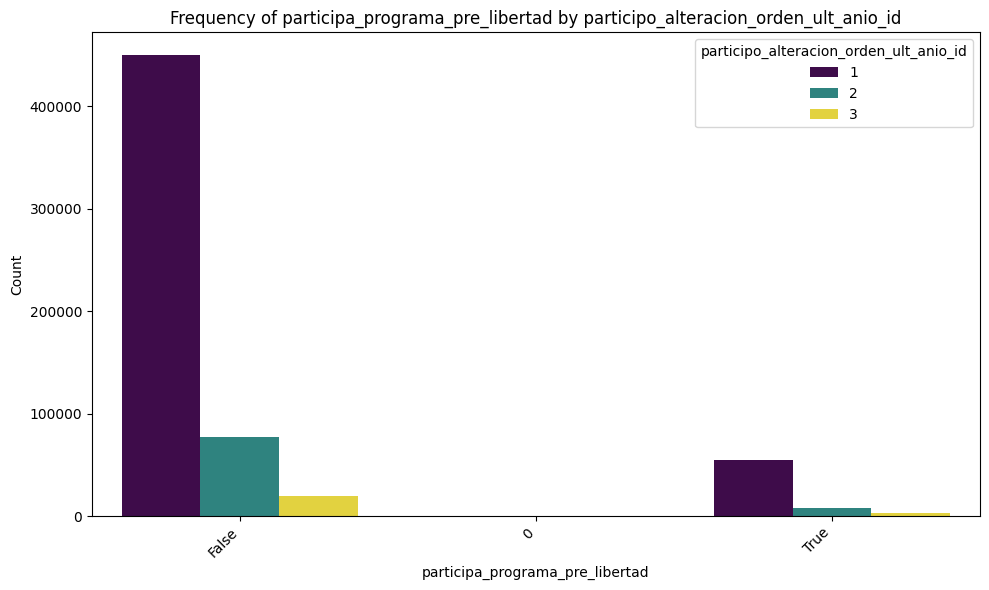

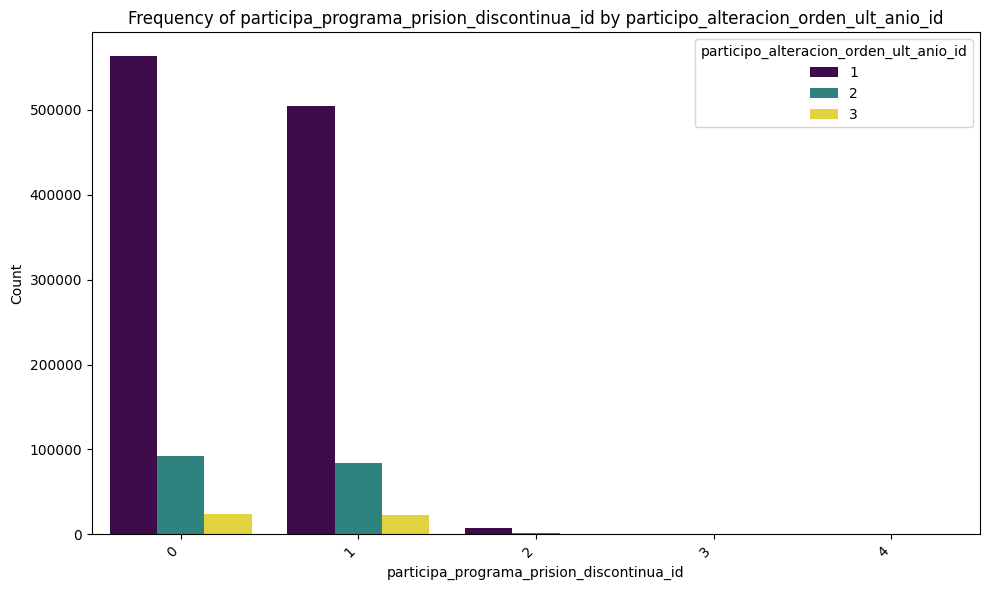

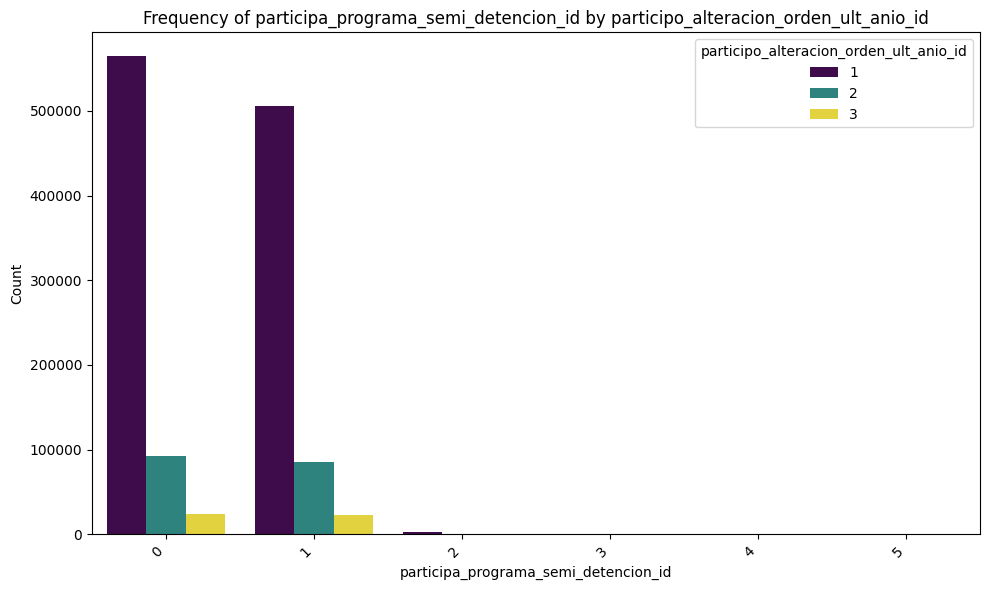

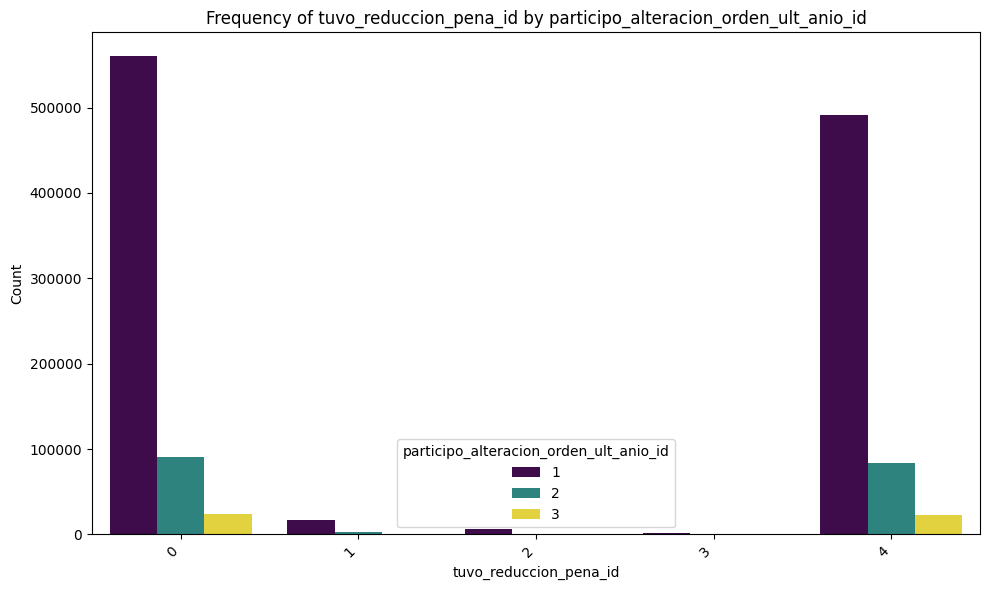

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_variable = 'participo_alteracion_orden_ult_anio_id'
columns_to_exclude = ['edad', 'duracion_condena_anios', target_variable]

for column in df_filtered.columns:
    if column not in columns_to_exclude:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df_filtered, x=column, hue=target_variable, palette='viridis')
        plt.title(f'Frequency of {column} by {target_variable}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

In [ ]:
# Analyze relative frequency of each variable in relation to the target
target_variable = 'participo_alteracion_orden_ult_anio_id'

for column in df_filtered.columns:
    if column != target_variable:
        print(f"\nRelative frequency table for '{column}' vs '{target_variable}':")
        display(pd.crosstab(df_filtered[column], df_filtered[target_variable], normalize='index'))

NameError: name 'df_filtered' is not defined

In [ ]:
# Display value counts and proportions of the 'nacionalidad_id' column
print("Value counts of 'nacionalidad_id':")
display(df_filtered['nacionalidad_id'].value_counts())

print("\nProportions of 'nacionalidad_id':")
display(df_filtered['nacionalidad_id'].value_counts(normalize=True))

Value counts of 'nacionalidad_id':


,count
nacionalidad_id,
2,1298379
0,3055



Proportions of 'nacionalidad_id':


,proportion
nacionalidad_id,
2,0.997653
0,0.002347


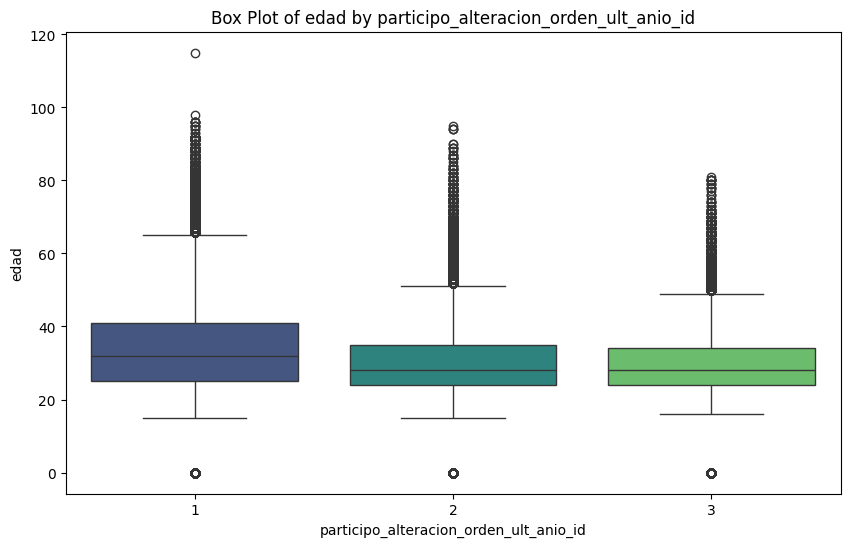

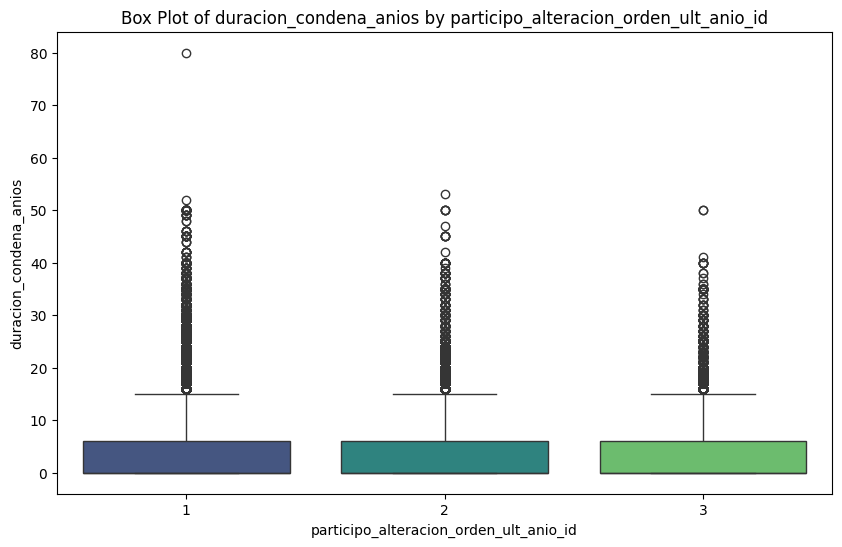

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_variable = 'participo_alteracion_orden_ult_anio_id'
columns_to_plot = ['edad', 'duracion_condena_anios']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_filtered, x=target_variable, y=column, palette='viridis')
    plt.title(f'Box Plot of {column} by {target_variable}')
    plt.xlabel(target_variable)
    plt.ylabel(column)
    plt.show()

## Análisis de Correlaciones

In [ ]:
# 7. Análisis Bivariado
# Select only numeric columns for correlation matrix
df_numeric = df_modified.select_dtypes(include=np.number)

# Computar matriz de correlación
corr_matrix = df_numeric.corr()

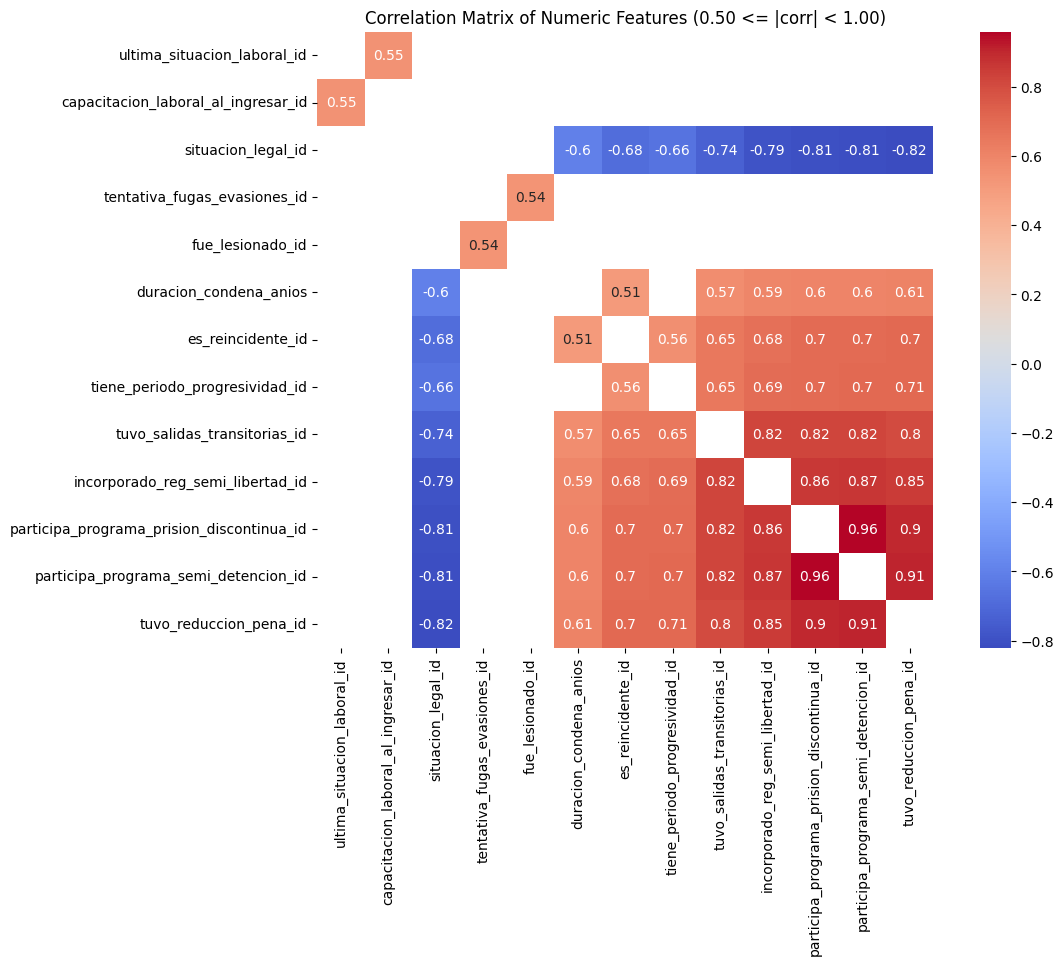

In [ ]:
# Filter the correlation matrix to show only correlations between 0.50 and 0.99
filtered_corr_matrix = corr_matrix[(corr_matrix >= 0.50) & (corr_matrix < 1.00) | (corr_matrix > -1.00) & (corr_matrix <= -0.50)]

# Remove rows and columns with all NaN values (due to filtering)
filtered_corr_matrix.dropna(axis=0, how='all', inplace=True)
filtered_corr_matrix.dropna(axis=1, how='all', inplace=True)


# Generate heatmap for filtered matrix
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Features (0.50 <= |corr| < 1.00)')
plt.show()

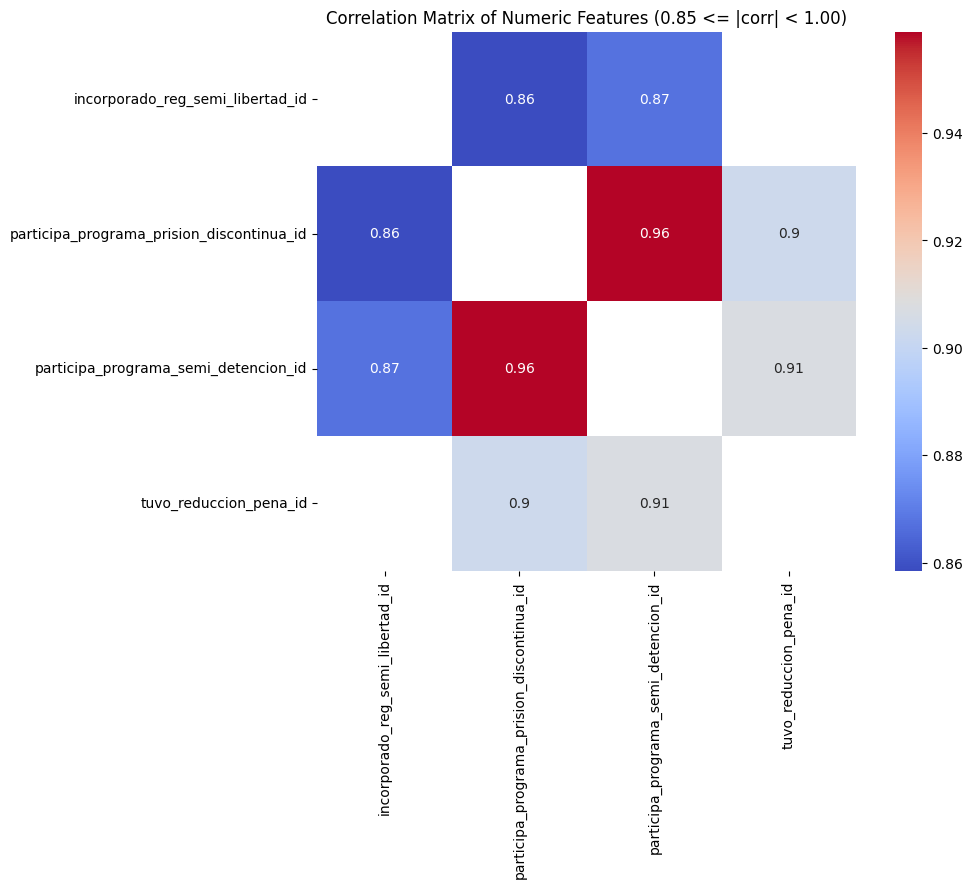

In [ ]:
# Filter the correlation matrix to show only correlations between 0.85 and 0.99
filtered_corr_matrix_high = corr_matrix[(corr_matrix >= 0.85) & (corr_matrix < 1.00) | (corr_matrix > -1.00) & (corr_matrix <= -0.85)]

# Remove rows and columns with all NaN values (due to filtering)
filtered_corr_matrix_high.dropna(axis=0, how='all', inplace=True)
filtered_corr_matrix_high.dropna(axis=1, how='all', inplace=True)


# Generate heatmap for filtered matrix
plt.figure(figsize=(10, 7))
sns.heatmap(filtered_corr_matrix_high, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Features (0.85 <= |corr| < 1.00)')
plt.show()

Si bien hay varias variables con correlacion mayor a 0,85, al no pensar utilizar un modelo de regresión logistica y no tener problema de multidimencionalidad, porque se cuenta con una bases de datos grande, en un primer momento no se van a agrupar variables ni eliminar.

In [ ]:
# Display value counts and proportions of the 'genero_id' column
print("Value counts of 'genero_id':")
display(df_filtered['genero_id'].value_counts())

print("\nProportions of 'genero_id':")
display(df_filtered['genero_id'].value_counts(normalize=True))

Value counts of 'genero_id':


,count
genero_id,
1,1238472
2,62010
3,861
4,89
5,2



Proportions of 'genero_id':


,proportion
genero_id,
1,0.951621
2,0.047647
3,0.000662
4,0.000068
5,0.000002


In [ ]:
df_modified = df_filtered

#Evaluación de Modelos

In [ ]:
# LIBRERIAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# PARAMETROS

rnd_state = 42

## Arboles de Desición: LGBM y CatBoost

## LGBMClassifier

Fold 1/5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.410468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 959779, number of used features: 36
[LightGBM] [Info] Start training from score -0.198818
[LightGBM] [Info] Start training from score -1.947255
[LightGBM] [Info] Start training from score -3.279801
  Train Accuracy: 0.9096
  Validation Accuracy: 0.9089
Fold 2/5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.260385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 959779, number of used features: 36
[LightGBM] [Info] Start training from score -0.198818
[Ligh

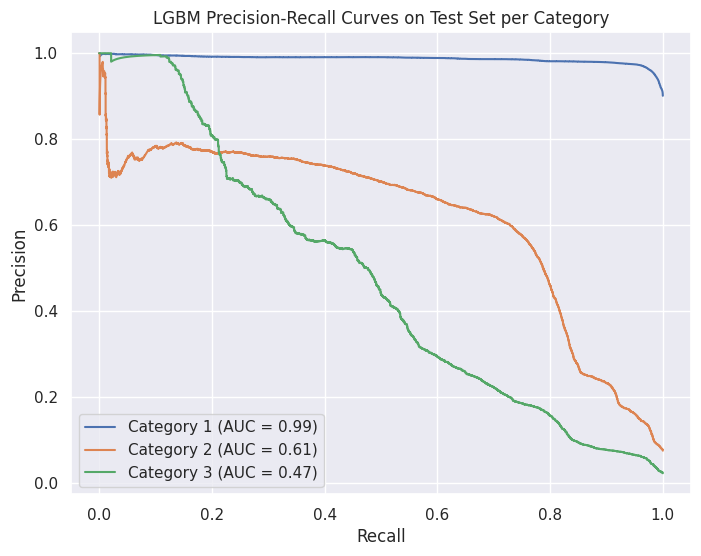

In [ ]:
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Separate features (X) and target (y)
X = df_modified.drop(['participo_alteracion_orden_ult_anio_id'], axis=1, errors='ignore')
y = df_modified['participo_alteracion_orden_ult_anio_id']

# Identify categorical features in X to encode
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Temporal Holdout Split
X_train_val = X[X['censo_anio'].isin(range(2002, 2022))]
y_train_val = y[X_train_val.index]
X_test = X[X['censo_anio'] == 2022]
y_test = y[X_test.index]

# Drop 'censo_anio' from the feature sets after splitting
X_train_val = X_train_val.drop('censo_anio', axis=1)
X_test = X_test.drop('censo_anio', axis=1)

# Ensure consistent columns after one-hot encoding and splitting
train_cols = X_train_val.columns
test_cols = X_test.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_val[c] = 0
X_test = X_test[train_cols]


# Stratified K-Fold Cross-Validation on train_val data
# Combine target and establecimiento_id for stratification
# This might require custom stratification logic if combined unique values are too many
# For simplicity, we will stratify on the target variable only for now
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=rnd_state)

lgbm_models = []
train_scores = []
val_scores = []

# Initialize LGBMClassifier
lgbm_base = LGBMClassifier(random_state=rnd_state)

for fold, (train_index, val_index) in enumerate(skf.split(X_train_val, y_train_val)):
    print(f"Fold {fold+1}/5")
    X_train_fold, X_val_fold = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train_fold, y_val_fold = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # Train the model on the training fold
    lgbm_fold = LGBMClassifier(random_state=rnd_state)
    lgbm_fold.fit(X_train_fold, y_train_fold)
    lgbm_models.append(lgbm_fold)

    # Evaluate on training and validation folds
    train_score = lgbm_fold.score(X_train_fold, y_train_fold)
    val_score = lgbm_fold.score(X_val_fold, y_val_fold)
    train_scores.append(train_score)
    val_scores.append(val_score)

    print(f"  Train Accuracy: {train_score:.4f}")
    print(f"  Validation Accuracy: {val_score:.4f}")

print("\nAverage Training Accuracy:", np.mean(train_scores))
print("Average Validation Accuracy:", np.mean(val_scores))

# For final evaluation, train on the entire X_train_val set and evaluate on X_test
lgbm_final = LGBMClassifier(random_state=rnd_state)
lgbm_final.fit(X_train_val, y_train_val)

# Evaluate on the test set
y_pred_lgbm_test = lgbm_final.predict(X_test)
report_lgbm_test = classification_report(y_test, y_pred_lgbm_test)
cm_lgbm_test = confusion_matrix(y_test, y_pred_lgbm_test)

print("\nLGBM Model Performance on Test Set:")
print("Classification Report:\n", report_lgbm_test)
print("Confusion Matrix:\n", cm_lgbm_test)

# Plot Precision-Recall Curve for the test set
y_probs_lgbm_test = lgbm_final.predict_proba(X_test)

plt.figure(figsize=(8, 6))
classes = lgbm_final.classes_
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_probs_lgbm_test[:, i])
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'Category {classes[i]} (AUC = {auc_score:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LGBM Precision-Recall Curves on Test Set per Category')
plt.legend()
plt.grid(True)
plt.show()

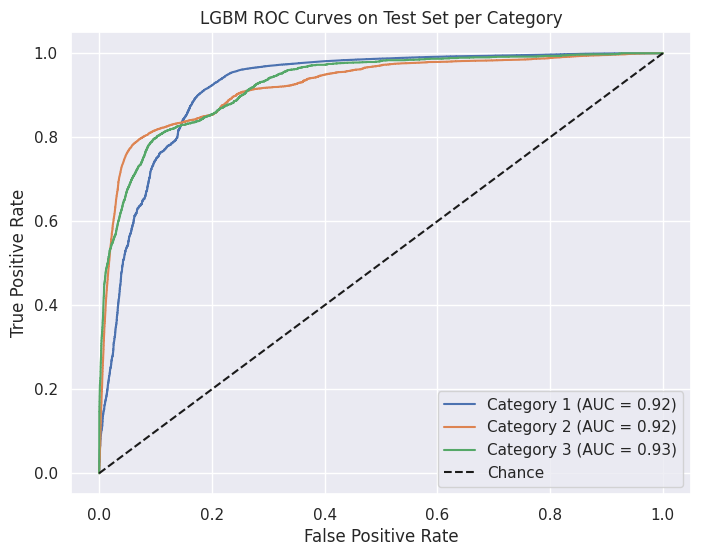

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output for multi-class
y_test_bin = label_binarize(y_test, classes=lgbm_final.classes_)
n_classes = y_test_bin.shape[1]

# Get predicted probabilities from LGBM model
y_probs_lgbm_test = lgbm_final.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs_lgbm_test[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Category {lgbm_final.classes_[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGBM ROC Curves on Test Set per Category')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Top 15 Feature Importances (LGBM - Relative Frequency):


,0
establecimiento_id,0.351222
tipo_infraccion_disciplinaria_id,0.087444
provincia_sneep_id,0.084889
fue_lesionado_id,0.058111
calificacion_conducta_id,0.043000
recibio_atencion_medica_ult_anio_True,0.039000
horas_trabajo_remunerado_id,0.038444
ultima_situacion_laboral_id,0.032000
participacion_programa_educativo_id,0.029000
capacitacion_laboral_al_ingresar_id,0.027111


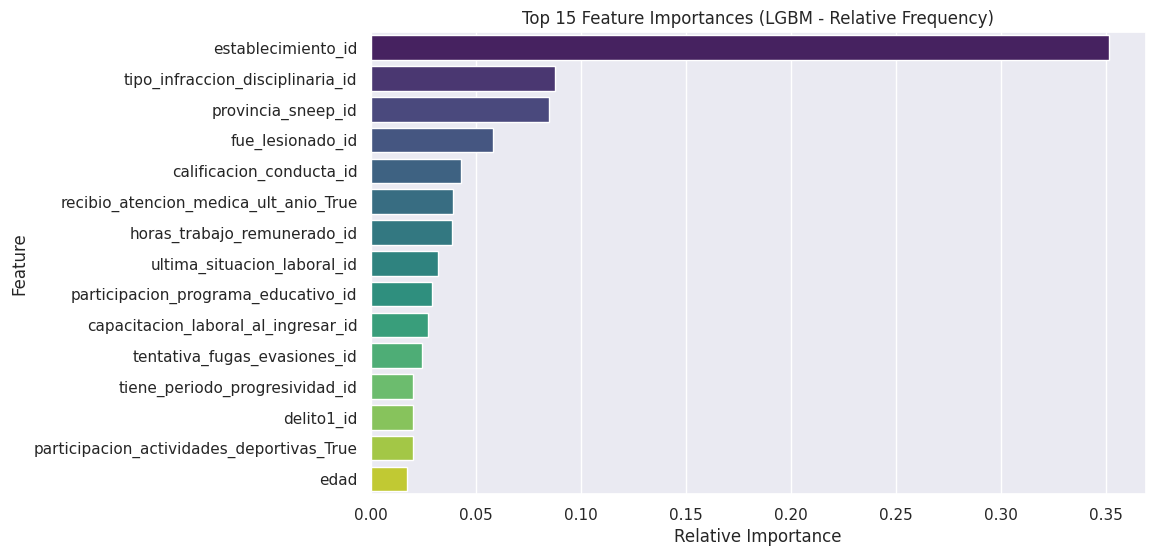

In [ ]:
# Display feature importances for LGBM
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances_lgbm = pd.Series(lgbm_final.feature_importances_, index=X_train_val.columns)

# Calculate relative frequencies
feature_importances_lgbm_relative = feature_importances_lgbm / feature_importances_lgbm.sum()

# Sort feature importances and get the top 15 relative frequencies
top_15_features_lgbm_relative = feature_importances_lgbm_relative.nlargest(15)


print("Top 15 Feature Importances (LGBM - Relative Frequency):")
display(top_15_features_lgbm_relative)

# Plot feature importances with relative frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_features_lgbm_relative.values, y=top_15_features_lgbm_relative.index, palette='viridis')
plt.title('Top 15 Feature Importances (LGBM - Relative Frequency)')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

# Modelo CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.7 MB/s eta 0:00:00


Fold 1/5
  Train Accuracy: 0.8712
  Validation Accuracy: 0.8697
Fold 2/5
  Train Accuracy: 0.8706
  Validation Accuracy: 0.8687
Fold 3/5
  Train Accuracy: 0.8716
  Validation Accuracy: 0.8685
Fold 4/5
  Train Accuracy: 0.8711
  Validation Accuracy: 0.8685
Fold 5/5
  Train Accuracy: 0.8710
  Validation Accuracy: 0.8666

Average Training Accuracy: 0.8710982692854674
Average Validation Accuracy: 0.8684205685870104

CatBoost Model Performance on Test Set:
Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.93      0.95     91652
           2       0.51      0.65      0.57      7701
           3       0.29      0.61      0.39      2357

    accuracy                           0.90    101710
   macro avg       0.59      0.73      0.64    101710
weighted avg       0.93      0.90      0.91    101710

Confusion Matrix:
 [[84950  4427  2275]
 [ 1356  5035  1310]
 [  488   428  1441]]


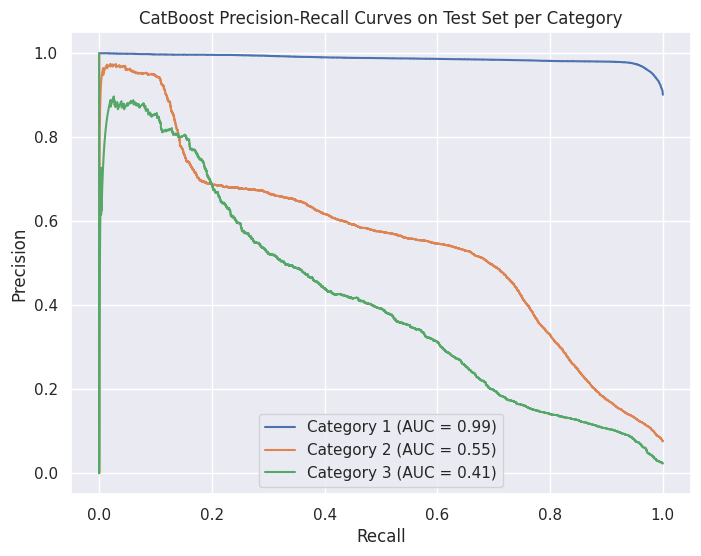

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight

# Separate features (X) and target (y)
X = df_modified.drop(['participo_alteracion_orden_ult_anio_id'], axis=1, errors='ignore')
y = df_modified['participo_alteracion_orden_ult_anio_id']

# Identify categorical features in X to encode
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Temporal Holdout Split
X_train_val = X[X['censo_anio'].isin(range(2002, 2022))]
y_train_val = y[X_train_val.index]
X_test = X[X['censo_anio'] == 2022]
y_test = y[X_test.index]

# Drop 'censo_anio' from the feature sets after splitting
X_train_val = X_train_val.drop('censo_anio', axis=1)
X_test = X_test.drop('censo_anio', axis=1)

# Ensure consistent columns after one-hot encoding and splitting
train_cols = X_train_val.columns
test_cols = X_test.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_val[c] = 0
X_test = X_test[train_cols]


# Calculate class weights for the training data
classes = np.unique(y_train_val)
weights = compute_class_weight('balanced', classes=classes, y=y_train_val)
class_weights = dict(zip(classes, weights))


# Stratified K-Fold Cross-Validation on train_val data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=rnd_state)

catboost_models = []
train_scores = []
val_scores = []

# Initialize CatBoostClassifier with class weights
catboost_base = CatBoostClassifier(random_state=rnd_state, verbose=0, class_weights=class_weights)

for fold, (train_index, val_index) in enumerate(skf.split(X_train_val, y_train_val)):
    print(f"Fold {fold+1}/5")
    X_train_fold, X_val_fold = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train_fold, y_val_fold = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # Train the model on the training fold
    catboost_fold = CatBoostClassifier(random_state=rnd_state, verbose=0, class_weights=class_weights)
    catboost_fold.fit(X_train_fold, y_train_fold)
    catboost_models.append(catboost_fold)

    # Evaluate on training and validation folds
    train_score = catboost_fold.score(X_train_fold, y_train_fold)
    val_score = catboost_fold.score(X_val_fold, y_val_fold)
    train_scores.append(train_score)
    val_scores.append(val_score)

    print(f"  Train Accuracy: {train_score:.4f}")
    print(f"  Validation Accuracy: {val_score:.4f}")

print("\nAverage Training Accuracy:", np.mean(train_scores))
print("Average Validation Accuracy:", np.mean(val_scores))

# For final evaluation, train on the entire X_train_val set and evaluate on X_test
catboost_final = CatBoostClassifier(random_state=rnd_state, verbose=0, class_weights=class_weights)
catboost_final.fit(X_train_val, y_train_val)

# Evaluate on the test set
y_pred_catboost_test = catboost_final.predict(X_test)
report_catboost_test = classification_report(y_test, y_pred_catboost_test)
cm_catboost_test = confusion_matrix(y_test, y_pred_catboost_test)

print("\nCatBoost Model Performance on Test Set:")
print("Classification Report:\n", report_catboost_test)
print("Confusion Matrix:\n", cm_catboost_test)

# Plot Precision-Recall Curve for the test set
y_probs_catboost_test = catboost_final.predict_proba(X_test)

plt.figure(figsize=(8, 6))
classes = catboost_final.classes_
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_probs_catboost_test[:, i])
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'Category {classes[i]} (AUC = {auc_score:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('CatBoost Precision-Recall Curves on Test Set per Category')
plt.legend()
plt.grid(True)
plt.show()

## Comparación de Modelos

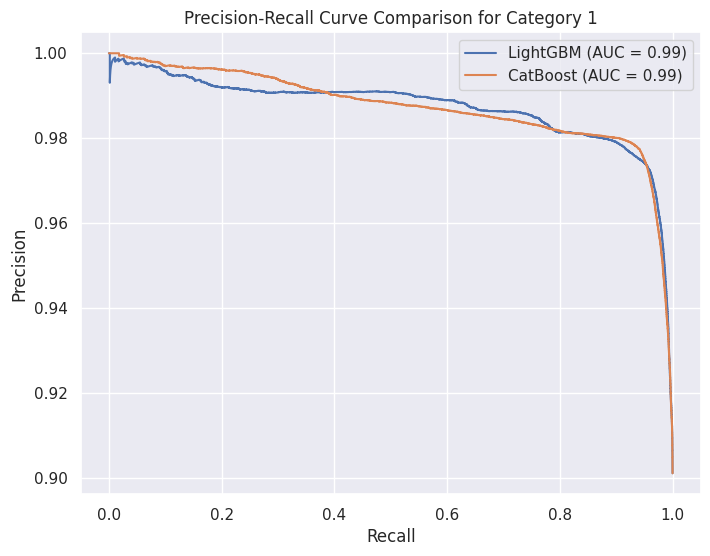

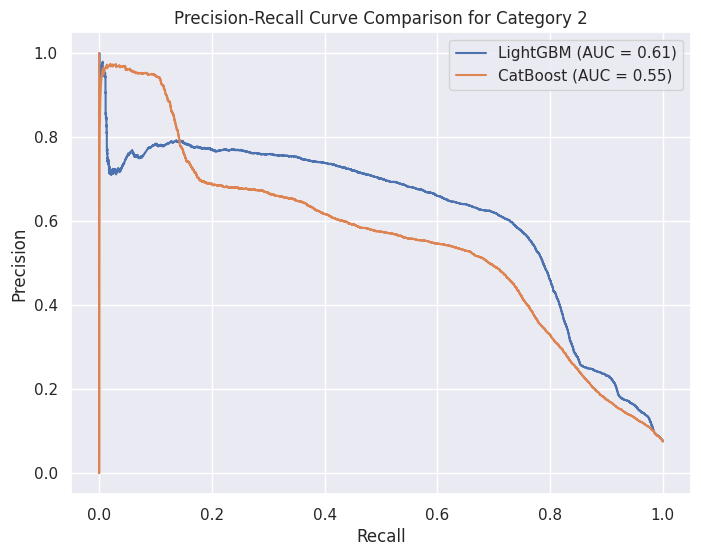

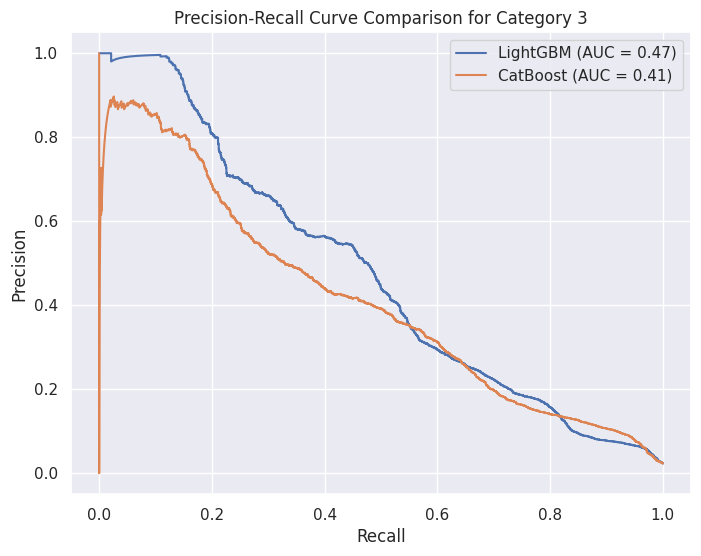

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output for multi-class
y_test_bin = label_binarize(y_test, classes=lgbm_final.classes_) # Assuming both models have the same classes
n_classes = y_test_bin.shape[1]

# Get predicted probabilities for both models
y_probs_lgbm_test = lgbm_final.predict_proba(X_test)
y_probs_catboost_test = catboost_final.predict_proba(X_test)

# Plot Precision-Recall curves for each class
for i in range(n_classes):
    plt.figure(figsize=(8, 6))

    # LGBM Precision-Recall curve
    precision_lgbm, recall_lgbm, _ = precision_recall_curve(y_test_bin[:, i], y_probs_lgbm_test[:, i])
    auc_lgbm = auc(recall_lgbm, precision_lgbm)
    plt.plot(recall_lgbm, precision_lgbm, label=f'LightGBM (AUC = {auc_lgbm:.2f})')

    # CatBoost Precision-Recall curve
    precision_catboost, recall_catboost, _ = precision_recall_curve(y_test_bin[:, i], y_probs_catboost_test[:, i])
    auc_catboost = auc(recall_catboost, precision_catboost)
    plt.plot(recall_catboost, precision_catboost, label=f'CatBoost (AUC = {auc_catboost:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve Comparison for Category {lgbm_final.classes_[i]}')
    plt.legend()
    plt.grid(True)
    plt.show()

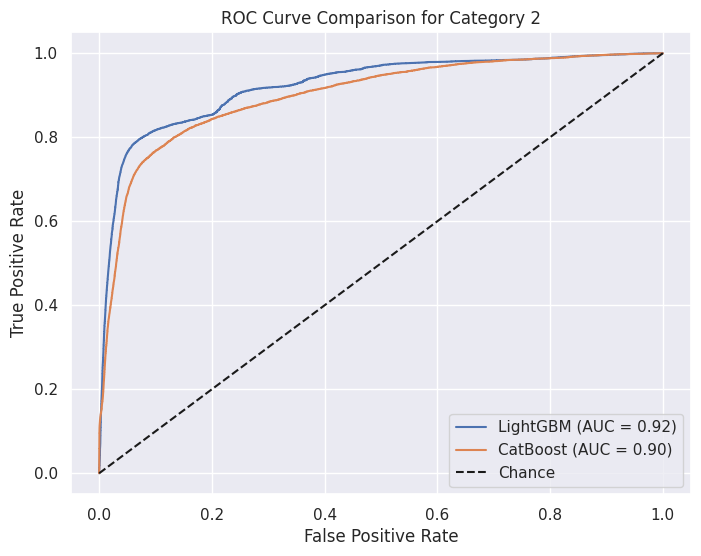

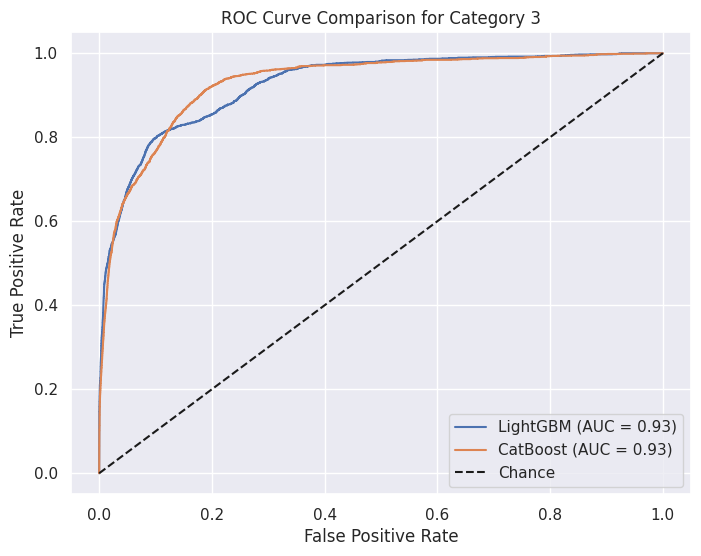

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for category 2 from LGBM model
y_probs_lgbm_cat2 = lgbm_final.predict_proba(X_test)[:, lgbm_final.classes_.tolist().index(2)]

# Calculate ROC curve and AUC for category 2 for LGBM
fpr_lgbm_cat2, tpr_lgbm_cat2, _ = roc_curve(y_test, y_probs_lgbm_cat2, pos_label=2)
roc_auc_lgbm_cat2 = auc(fpr_lgbm_cat2, tpr_lgbm_cat2)

# Get predicted probabilities for category 2 from CatBoost model
y_probs_catboost_cat2 = catboost_final.predict_proba(X_test)[:, catboost_final.classes_.tolist().index(2)]

# Calculate ROC curve and AUC for category 2 for CatBoost
fpr_catboost_cat2, tpr_catboost_cat2, _ = roc_curve(y_test, y_probs_catboost_cat2, pos_label=2)
roc_auc_catboost_cat2 = auc(fpr_catboost_cat2, tpr_catboost_cat2)

# Plot ROC curves for category 2
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm_cat2, tpr_lgbm_cat2, label=f'LightGBM (AUC = {roc_auc_lgbm_cat2:.2f})')
plt.plot(fpr_catboost_cat2, tpr_catboost_cat2, label=f'CatBoost (AUC = {roc_auc_catboost_cat2:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Category 2')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Get predicted probabilities for category 3 from LGBM model
y_probs_lgbm_cat3 = lgbm_final.predict_proba(X_test)[:, lgbm_final.classes_.tolist().index(3)]

# Calculate ROC curve and AUC for category 3 for LGBM
fpr_lgbm_cat3, tpr_lgbm_cat3, _ = roc_curve(y_test, y_probs_lgbm_cat3, pos_label=3)
roc_auc_lgbm_cat3 = auc(fpr_lgbm_cat3, tpr_lgbm_cat3)

# Get predicted probabilities for category 3 from CatBoost model
y_probs_catboost_cat3 = catboost_final.predict_proba(X_test)[:, catboost_final.classes_.tolist().index(3)]

# Calculate ROC curve and AUC for category 3 for CatBoost
fpr_catboost_cat3, tpr_catboost_cat3, _ = roc_curve(y_test, y_probs_catboost_cat3, pos_label=3)
roc_auc_catboost_cat3 = auc(fpr_catboost_cat3, tpr_catboost_cat3)

# Plot ROC curves for category 3
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm_cat3, tpr_lgbm_cat3, label=f'LightGBM (AUC = {roc_auc_lgbm_cat3:.2f})')
plt.plot(fpr_catboost_cat3, tpr_catboost_cat3, label=f'CatBoost (AUC = {roc_auc_catboost_cat3:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Category 3')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Reasoning**:
Extract the precision, recall, and f1-score for categories 2 and 3 from the classification reports of both the LGBM and CatBoost models by parsing the report strings.



#### Create a DataFrame to display the extracted metrics for comparison.



In [ ]:
# Create a DataFrame for comparison
metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-score', 'ROC AUC', 'PR AUC'],
    'LGBM (Category 2)': lgbm_metrics_cat2 + [roc_auc_lgbm_cat2, auc_lgbm], # Assuming auc_lgbm stores the PR AUC for category 2
    'CatBoost (Category 2)': catboost_metrics_cat2 + [roc_auc_catboost_cat2, auc_catboost], # Assuming auc_catboost stores the PR AUC for category 2
    'LGBM (Category 3)': lgbm_metrics_cat3 + [roc_auc_lgbm_cat3, auc_lgbm], # Need to get the correct PR AUC for category 3 for LGBM
    'CatBoost (Category 3)': catboost_metrics_cat3 + [roc_auc_catboost_cat3, auc_catboost] # Need to get the correct PR AUC for category 3 for CatBoost
}

# Assuming auc_lgbm and auc_catboost from cell DiZsTDwHMkaQ store AUC PR for category 3
# If not, I need to recalculate or extract. Let's assume they are available.
# Based on the output of DiZsTDwHMkaQ, auc_score is updated in the loop, so I need to re-calculate or extract.

# Recalculate PR AUC for categories 2 and 3 if not readily available
# For LGBM:
precision_lgbm_cat2, recall_lgbm_cat2, _ = precision_recall_curve(y_test_bin[:, lgbm_final.classes_.tolist().index(2)], y_probs_lgbm_test[:, lgbm_final.classes_.tolist().index(2)])
auc_pr_lgbm_cat2 = auc(recall_lgbm_cat2, precision_lgbm_cat2)

precision_lgbm_cat3, recall_lgbm_cat3, _ = precision_recall_curve(y_test_bin[:, lgbm_final.classes_.tolist().index(3)], y_probs_lgbm_test[:, lgbm_final.classes_.tolist().index(3)])
auc_pr_lgbm_cat3 = auc(recall_lgbm_cat3, precision_lgbm_cat3)

# For CatBoost:
precision_catboost_cat2, recall_catboost_cat2, _ = precision_recall_curve(y_test_bin[:, catboost_final.classes_.tolist().index(2)], y_probs_catboost_test[:, catboost_final.classes_.tolist().index(2)])
auc_pr_catboost_cat2 = auc(recall_catboost_cat2, precision_catboost_cat2)

precision_catboost_cat3, recall_catboost_cat3, _ = precision_recall_curve(y_test_bin[:, catboost_final.classes_.tolist().index(3)], y_probs_catboost_test[:, catboost_final.classes_.tolist().index(3)])
auc_pr_catboost_cat3 = auc(recall_catboost_cat3, precision_catboost_cat3)


metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1-score', 'ROC AUC', 'PR AUC'],
    'LGBM (Category 2)': lgbm_metrics_cat2 + [roc_auc_lgbm_cat2, auc_pr_lgbm_cat2],
    'CatBoost (Category 2)': catboost_metrics_cat2 + [roc_auc_catboost_cat2, auc_pr_catboost_cat2],
    'LGBM (Category 3)': lgbm_metrics_cat3 + [roc_auc_lgbm_cat3, auc_pr_lgbm_cat3],
    'CatBoost (Category 3)': catboost_metrics_cat3 + [roc_auc_catboost_cat3, auc_pr_catboost_cat3]
}


metrics_df = pd.DataFrame(metrics_data)

# Display the comparison table
display(metrics_df)

,Metric,LGBM (Category 2),CatBoost (Category 2),LGBM (Category 3),CatBoost (Category 3)
0,Precision,0.650000,0.510000,0.580000,0.290000
1,Recall,0.610000,0.650000,0.340000,0.610000
2,F1-score,0.630000,0.570000,0.430000,0.390000
3,ROC AUC,0.922589,0.899556,0.926089,0.930352
4,PR AUC,0.614325,0.554705,0.471354,0.409782


In [ ]:
from sklearn.metrics import precision_score
import numpy as np
import pandas as pd

# Function to calculate Precision@K
def precision_at_k(y_true, y_scores, k, pos_label):
    """
    Calculate Precision@K for a specific positive class.

    Args:
        y_true (array): True binary labels.
        y_scores (array): Target scores (probabilities).
        k (int): The number of top-ranked instances to consider.
        pos_label: The positive class label.

    Returns:
        float: Precision@K score.
    """
    # Ensure y_true and y_scores are numpy arrays
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)

    # Filter for the positive class scores and corresponding true labels
    positive_class_scores = y_scores[:, list(lgbm_final.classes_).index(pos_label)]

    # Get the indices of the top K instances based on scores
    top_k_indices = np.argsort(positive_class_scores)[::-1][:k]

    # Get the true labels for the top K instances
    true_labels_at_k = y_true[top_k_indices]

    # Count the number of true positives in the top K
    true_positives_at_k = np.sum(true_labels_at_k == pos_label)

    # Calculate Precision@K
    precision_k = true_positives_at_k / k if k > 0 else 0

    return precision_k

# Define different values of K to evaluate
k_values = [10, 50, 100, 500, 1000]

# Initialize a dictionary to store Precision@K results
precision_at_k_results = {}

# Calculate Precision@K for LGBM and CatBoost for Category 2
precision_at_k_results['LGBM (Category 2)'] = [
    precision_at_k(y_test, lgbm_final.predict_proba(X_test), k, pos_label=2) for k in k_values
]
precision_at_k_results['CatBoost (Category 2)'] = [
    precision_at_k(y_test, catboost_final.predict_proba(X_test), k, pos_label=2) for k in k_values
]

# Calculate Precision@K for LGBM and CatBoost for Category 3
precision_at_k_results['LGBM (Category 3)'] = [
    precision_at_k(y_test, lgbm_final.predict_proba(X_test), k, pos_label=3) for k in k_values
]
precision_at_k_results['CatBoost (Category 3)'] = [
    precision_at_k(y_test, catboost_final.predict_proba(X_test), k, pos_label=3) for k in k_values
]

# Create a DataFrame to display the results
precision_at_k_df = pd.DataFrame(precision_at_k_results, index=[f'Precision@{k}' for k in k_values])

# Display the comparison table
print("Precision@K Comparison for Categories 2 and 3:")
display(precision_at_k_df)

Precision@K Comparison for Categories 2 and 3:


,LGBM (Category 2),CatBoost (Category 2),LGBM (Category 3),CatBoost (Category 3)
Precision@10,0.900,0.900,1.000,0.700
Precision@50,0.980,0.960,1.000,0.880
Precision@100,0.880,0.970,0.990,0.880
Precision@500,0.754,0.956,0.848,0.772
Precision@1000,0.784,0.903,0.667,0.592


In [ ]:
print("LGBM Model Performance on Test Set:")
print("Classification Report:\n", report_lgbm_test)
print("\nCatBoost Model Performance on Test Set:")
print("Classification Report:\n", report_catboost_test)

LGBM Model Performance on Test Set:
Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.98      0.97     91652
           2       0.65      0.61      0.63      7701
           3       0.58      0.34      0.43      2357

    accuracy                           0.93    101710
   macro avg       0.73      0.64      0.68    101710
weighted avg       0.93      0.93      0.93    101710


CatBoost Model Performance on Test Set:
Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.93      0.95     91652
           2       0.51      0.65      0.57      7701
           3       0.29      0.61      0.39      2357

    accuracy                           0.90    101710
   macro avg       0.59      0.73      0.64    101710
weighted avg       0.93      0.90      0.91    101710



## Summary of Findings and Model Comparison

Based on the temporal holdout evaluation and cross-validation:

**LGBM Model Performance (Test Set):**
- **Classification Report:**

## Comparación y Conclusión:

Para comparar los modelos de manera efectiva, nos enfocamos en las métricas de rendimiento para las categorías 2 (“Sí – Alteración del orden leve”) y 3 (“Sí – Alteración del orden grave”), ya que estas representan las instancias de alteraciones en el orden que estamos tratando de predecir. La categoría 1 (“No participó de ninguna alteración”) es la clase mayoritaria y, aunque una alta precisión en esta clase se espera debido al desbalanceo de clases, nuestro interés principal en los modelos radica en su capacidad de identificar las categorías de alteraciones menos frecuentes.

Revisando los Reportes de Clasificación:

Para la Categoría 2: LGBM muestra mayor Precisión (0.65 vs 0.51) y un Recall ligeramente menor (0.61 vs 0.65) comparado con CatBoost. El puntaje F1 es ligeramente superior para LGBM (0.63 vs 0.57).

Para la Categoría 3: LGBM tiene mayor Precisión (0.58 vs 0.29) y menor Recall (0.34 vs 0.61) comparado con CatBoost. El puntaje F1 es superior para LGBM (0.43 vs 0.39).

Revisando los valores de AUC:

Para la Categoría 2: LGBM tiene un ROC AUC más alto (0.92 vs 0.90) y un PR AUC más alto (0.61 vs 0.55).

Para la Categoría 3: CatBoost tiene un ROC AUC ligeramente mayor (0.93 vs 0.93) y LGBM tiene un PR AUC mayor (0.47 vs 0.41).

Revisando los resultados de Precisión@K:

Para la Categoría 2: CatBoost generalmente funciona mejor en valores de K más altos (Precisión@500 y Precisión@1000), lo que indica que entre las predicciones principales, CatBoost identifica una mayor proporción de instancias reales de Categoría 2. Sin embargo, LGBM muestra mayor Precisión@10 y Precisión@50.

Para la Categoría 3: LGBM muestra mayor Precisión@K para la mayoría de los valores, en particular en valores bajos de K (Precisión@10, 50, 100, 500). Esto sugiere que cuando observamos un pequeño número de las predicciones más confiables para la Categoría 3, LGBM es más probable que sea correcto.

Conclusión:

Con base en las métricas de evaluación, el modelo LGBM generalmente tiene un mejor rendimiento al predecir alteraciones en el orden, particularmente para la Categoría 3.

Si bien CatBoost muestra un Recall más alto para las categorías 2 y 3, LGBM demuestra mayor precisión para ambas categorías y mejor rendimiento general según los puntajes F1 y PR AUC para la Categoría 2 y Precisión@K para la Categoría 3.

La mayor precisión de LGBM significa que cuando predice una alteración en el orden (categorías 2 o 3), es más probable que sea correcto. Cómo el objetivo es identificar instancias precisas de alteración del orden entre las principales predicciones, LGBM muestra un desempeño más sólido, especialmente para la Categoría 3.